# Title :  1985 automobile 

### mini project for 2nd interview (9/1)

In [1]:
%cd automobile

/Users/sinsanghun/automobile


In [2]:
%ls

Index.txt         imports-85.names  misc.txt
imports-85.data   mini2.csv


In [3]:
import sys 
sys.path.append("/Users/sinsanghun/anaconda/lib/python2.7/site-packages")

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
from scipy import stats
import statsmodels.stats.api as sms
import sklearn as sk
from sklearn.preprocessing import Imputer
from scipy.stats import zscore
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from statsmodels.graphics import utils

pd.options.display.max_columns = 70
%matplotlib inline

/Users/sinsanghun/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Loading data

In this step, I followed the intsruction on mail says

In [5]:
feature_col = ["symboling",
              "normalized_losses",
              "make",
              "fuel_type",
              "aspiration",
              "num_of_doors",
              "body_style",
              "drive_wheels",
              "engine_location",
              "wheel_base",
              "length",
              "width",
              "height",
              "curb_weight",
              "engine_type",
               "num_of_cylinders",
               "engine_size",
              "fuel_system",
              "bore",
              "stroke",
              "compression_ratio",
              "horsepower",
              "peak_rpm",
              "city_mpg",
              "highway_mpg",
              "price"]

In [6]:
def load_data():
    
    df = pd.read_csv("imports-85.data", names=feature_col)
    
    # print how many datas in files 
    print("Dimension :", df.shape[0], "x", df.shape[1])

    # replace "?" with NaN
    df = df.replace("?", np.NaN)

    # check the number of missing values in each columns
    print("---------------------------------------------")
    print("the number of missing values in each columns")
    print(df.isnull().sum())
    print("---------------------------------------------")

    # Skip data samples with missing values in the target.
    df = df[df["normalized_losses"].notnull()]
    df.shape

    # target values
    dfy = df["normalized_losses"]

    # Because of instruction to ingnore the 'symboling' feature
    dfX = df.iloc[:, 2:] 
    print("Dimension :", df.shape[0], "x", df.shape[1])
    return dfX, dfy

In [7]:
dfX, dfy = load_data();

Dimension : 205 x 26
---------------------------------------------
the number of missing values in each columns
symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64
---------------------------------------------
Dimension : 164 x 26


In [8]:
dfX.head()

make fuel_type aspiration num_of_doors body_style drive_wheels  \
3   audi       gas        std         four      sedan          fwd   
4   audi       gas        std         four      sedan          4wd   
6   audi       gas        std         four      sedan          fwd   
8   audi       gas      turbo         four      sedan          fwd   
10   bmw       gas        std          two      sedan          rwd   

   engine_location  wheel_base  length  width  height  curb_weight  \
3            front        99.8   176.6   66.2    54.3         2337   
4            front        99.4   176.6   66.4    54.3         2824   
6            front       105.8   192.7   71.4    55.7         2844   
8            front       105.8   192.7   71.4    55.9         3086   
10           front       101.2   176.8   64.8    54.3         2395   

   engine_type num_of_cylinders  engine_size fuel_system  bore stroke  \
3          ohc             four          109        mpfi  3.19   3.40   
4          ohc             five          136        mpfi  3.19   3.40   
6          ohc             five          136        mpfi  3.19   3.40   
8          ohc             five          131        mpfi  3.13   3.40   
10         ohc             four          108        mpfi  3.50   2.80   

    compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  price  
3                10.0        102     5500        24           30  13950  
4                 8.0        115     5500        18           22  17450  
6                 8.5        110     5500        19           25  17710  
8                 8.3        140     5500        17           20  23875  
10                8.8        101     5800        23           29  16430

### Convert num-of-doors, num-of-cylinders to numerical feature

Next, I changed the data represented by words like one, two, three ,four ... into numeric data using mapping function.

In [9]:
dfX["num_of_doors"].value_counts()

four    95
two     68
Name: num_of_doors, dtype: int64

In [10]:
dfX["num_of_cylinders"].value_counts()

four     137
six       14
five       7
two        4
eight      1
three      1
Name: num_of_cylinders, dtype: int64

In [11]:
number_mapping = {"one" : 1, "two" : 2, "three" : 3, "four" : 4, 
                 "five" : 5, "six" : 6, "seven" : 7, "eight" : 8}

In [12]:
dfX["num_of_doors"] = dfX["num_of_doors"].map(number_mapping)

In [13]:
dfX["num_of_cylinders"] = dfX["num_of_cylinders"].map(number_mapping)

In [14]:
dfX["num_of_doors"].value_counts()

4.0    95
2.0    68
Name: num_of_doors, dtype: int64

In [15]:
dfX["num_of_cylinders"].value_counts()

4    137
6     14
5      7
2      4
8      1
3      1
Name: num_of_cylinders, dtype: int64

### Convert feature's type to proper type 

I changed the data type. The numeric data which isn’t float or int types were changed.

In [16]:
numeric = ["num_of_doors", "wheel_base", "length", "width", "height", "curb_weight", "num_of_cylinders",
           "engine_size", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", 
           "highway_mpg", "price"]

categorical = ["make", "fuel_type", "aspiration",  "body_style", "drive_wheels",
               "engine_location", "engine_type","fuel_system"]

print("numeric features :", len(numeric))
print("categorical features :", len(categorical))

numeric features : 16
categorical features : 8


In [17]:
dtype_df = dfX.dtypes.reset_index()
dtype_df.columns = ["Feature", "Column Type"]
dtype_df

Feature Column Type
0                make      object
1           fuel_type      object
2          aspiration      object
3        num_of_doors     float64
4          body_style      object
5        drive_wheels      object
6     engine_location      object
7          wheel_base     float64
8              length     float64
9               width     float64
10             height     float64
11        curb_weight       int64
12        engine_type      object
13   num_of_cylinders       int64
14        engine_size       int64
15        fuel_system      object
16               bore      object
17             stroke      object
18  compression_ratio     float64
19         horsepower      object
20           peak_rpm      object
21           city_mpg       int64
22        highway_mpg       int64
23              price      object

In [18]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Column Type  Feature
0       int64        5
1     float64        6
2      object       13

In [19]:
dfX[numeric] = dfX[numeric].astype(float)
dfX[categorical] = dfX[categorical].astype(str)

In [20]:
dfy = dfy.astype(float)

In [21]:
dtype_df = dfX.dtypes.reset_index()
dtype_df.columns = ["Feature", "Column Type"]
dtype_df.groupby("Column Type").count()

Feature
Column Type         
float64           16
object             8

In [22]:
print("Dimension :", dfX.shape[0], "x", dfX.shape[1])

Dimension : 164 x 24


# Distribution for each column

In [23]:
# temporarily fill the NaN for visualizing 
dfX2 = dfX.copy()
dfy2 = dfy.copy()
dfX["num_of_doors"] = dfX["num_of_doors"].fillna(dfX.num_of_doors.median())
dfX["bore"] = dfX["bore"].fillna(dfX.bore.median())
dfX["stroke"] = dfX["stroke"].fillna(dfX.stroke.median());

### target feature - normalized losses

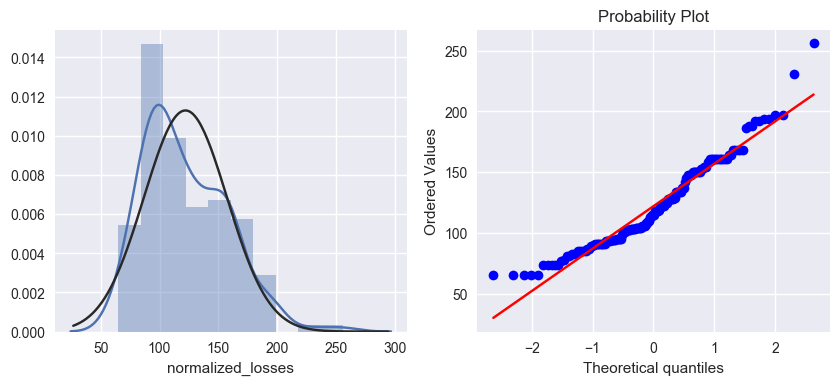

In [24]:
plt.figure(figsize=(10, 4), dpi=100)
plt.subplot(121)
sns.distplot(dfy, fit=sp.stats.norm)
plt.subplot(122)
sp.stats.probplot(np.array(dfy).reshape(164,), plot=plt)
plt.show()

### log transforamtion

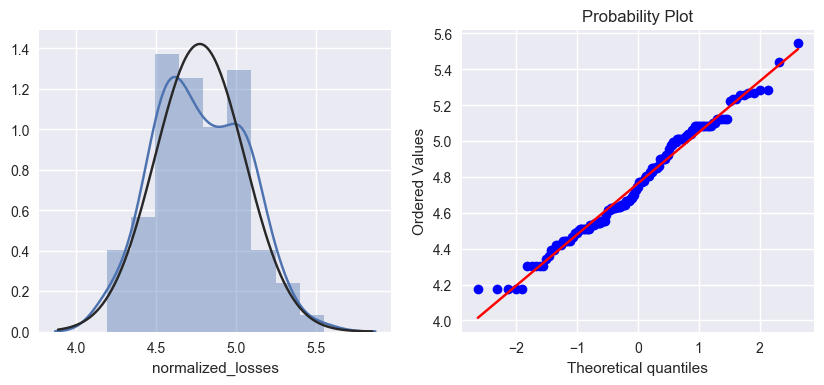

In [25]:
plt.figure(figsize=(10, 4), dpi=100)
plt.subplot(121)
sns.distplot(np.log(dfy+1), fit=sp.stats.norm)
plt.subplot(122)
sp.stats.probplot(np.array(np.log(dfy)).reshape(164,), plot=plt)
plt.show()

In [26]:
# log transformation
dfy2 = np.log1p(dfy2)

### categorical features distribution

I used count plot to find out category variable distribution. Nothing was distinctive, and I decided not to use engine_location which has just one level 

In [27]:
def count_plot(df, feature):
    plt.figure(figsize=(12,16), dpi=200)
    for i in range(len(feature)):
        plt.subplot(4, 2, i+1)
        a=sns.countplot(df[feature[i]])
        plt.setp(a.get_xticklabels(), rotation=90)
        plt.tight_layout()

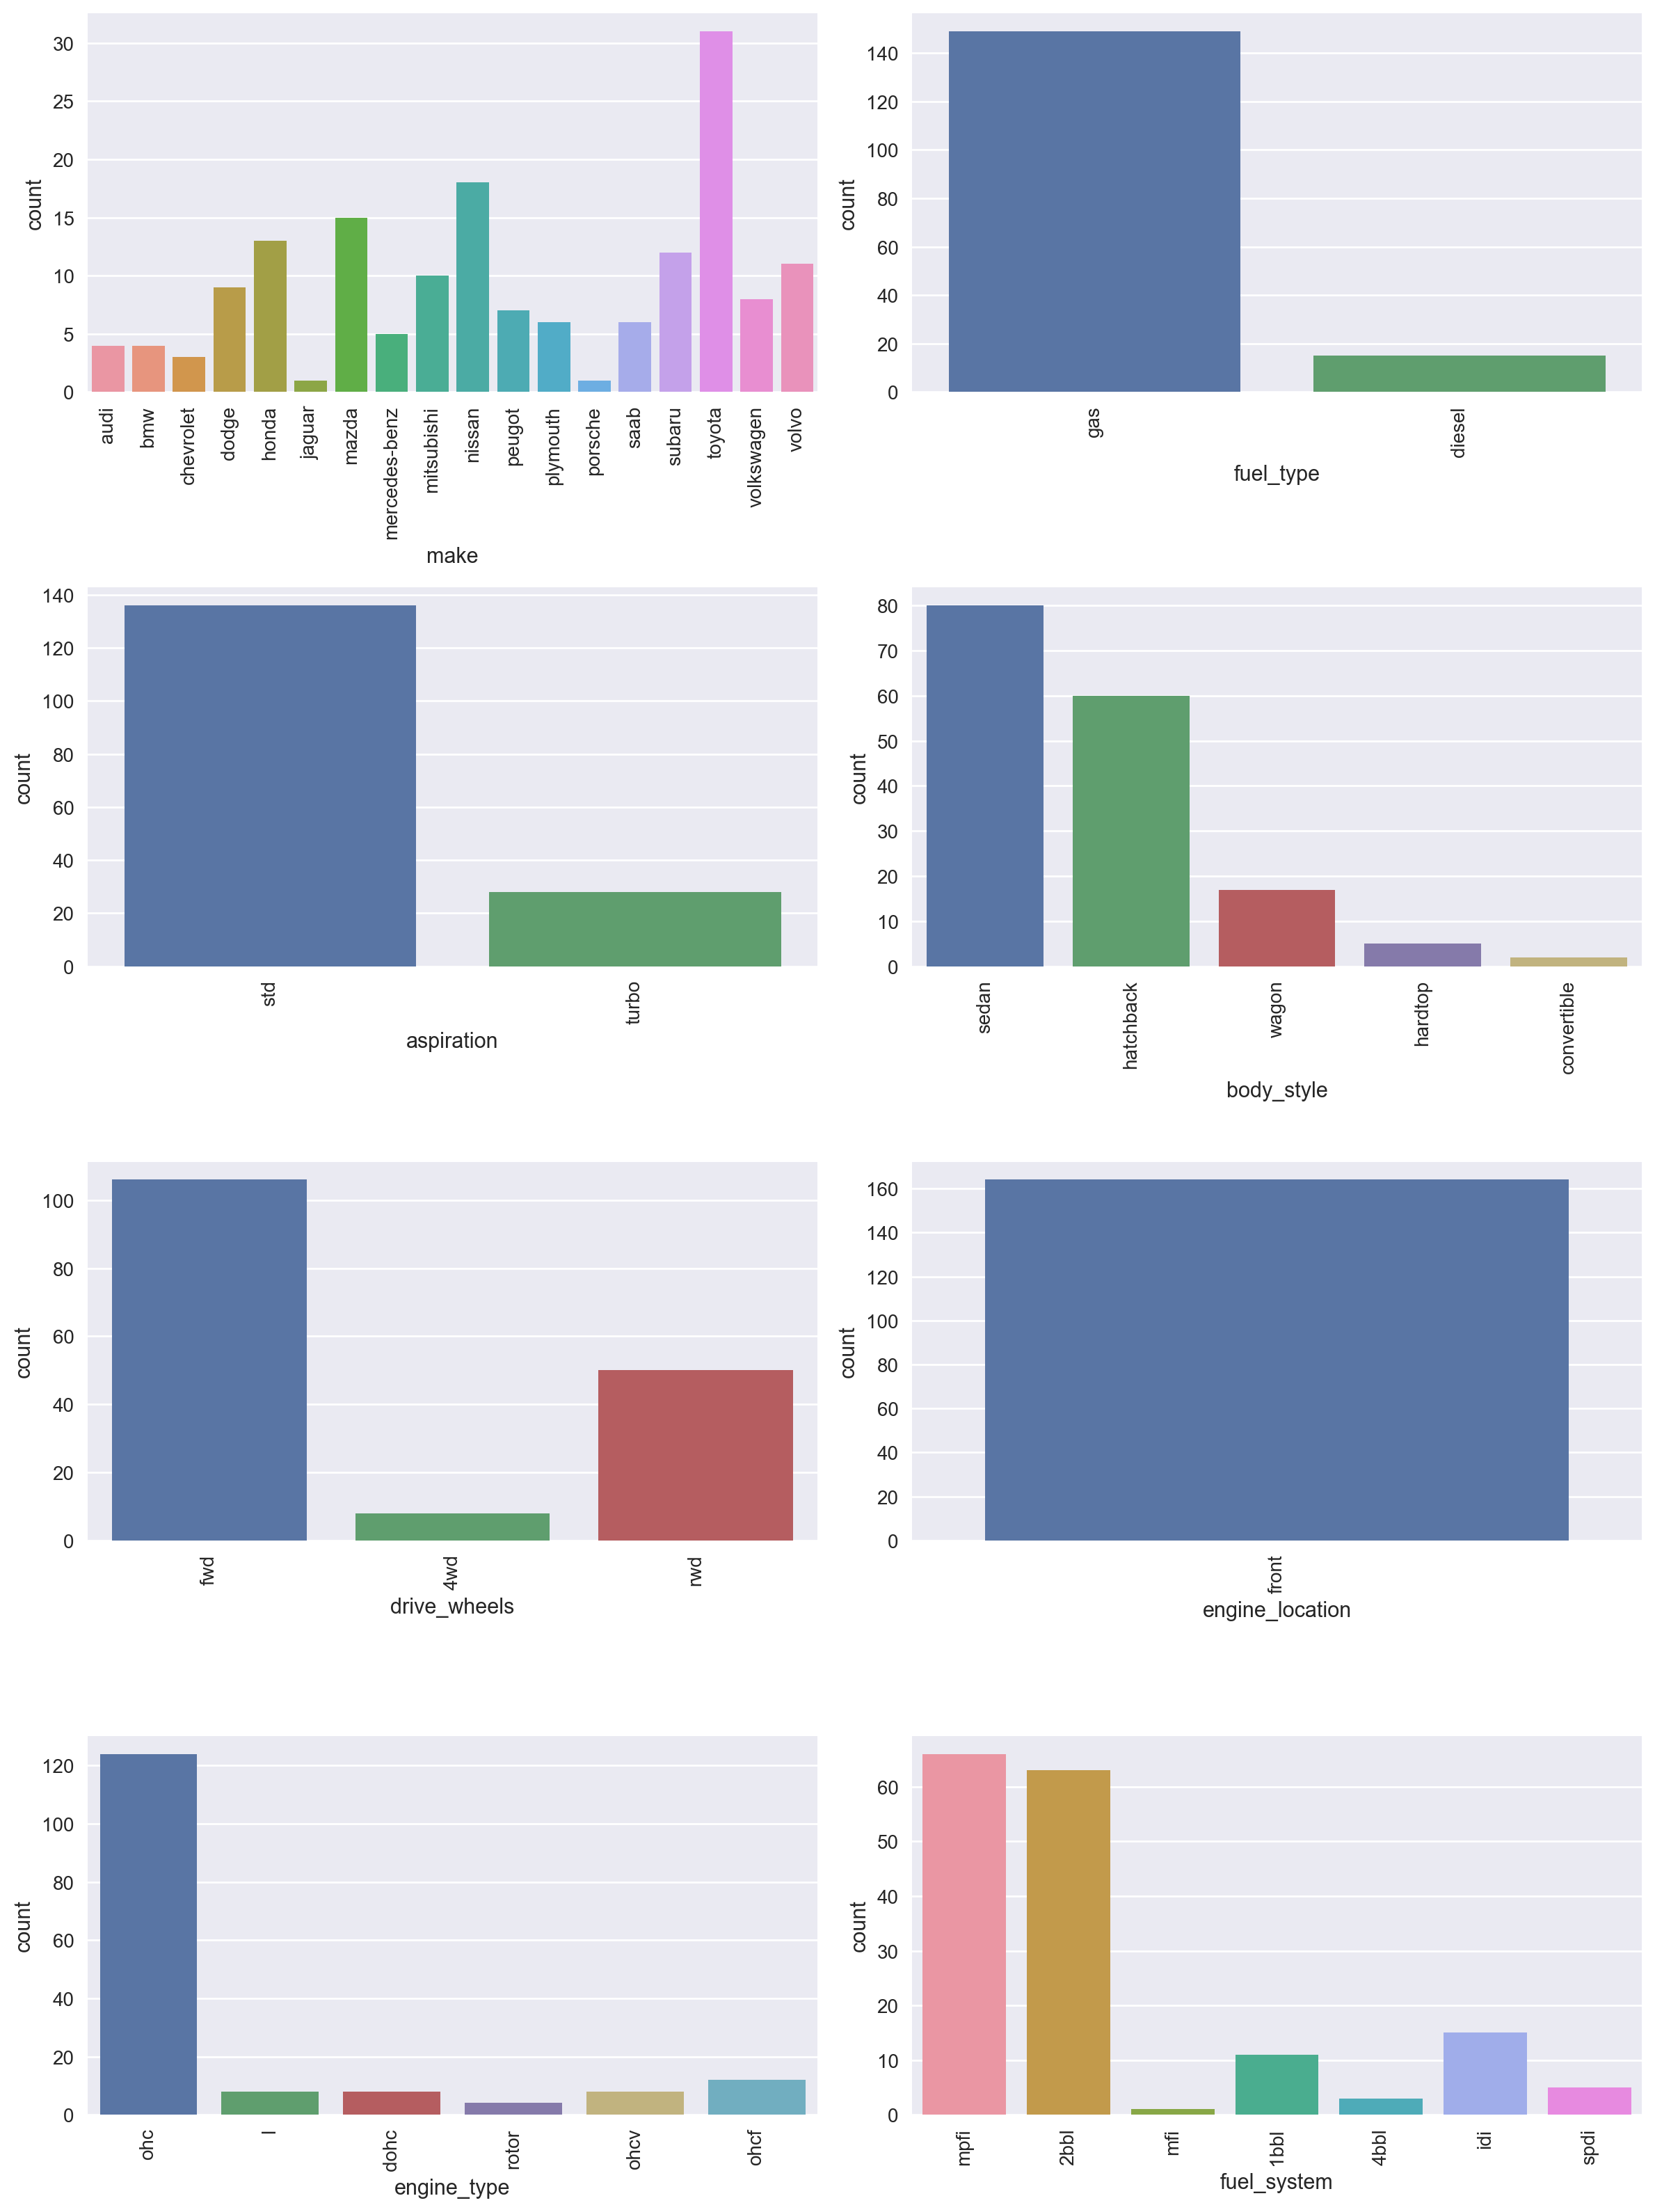

In [28]:
count_plot(dfX, categorical)

And used box plot to see the relationship between target variable and category variables.

In [29]:
def box_plot(df, dfy, feature):
    plt.figure(figsize=(12,16), dpi=200)
    for i in range(len(feature)):
        plt.subplot(4, 2, i+1)
        a = sns.boxplot(x=df[feature[i]], y=dfy, data=df)
        plt.tight_layout()
        plt.setp(a.get_xticklabels(), rotation=90)
        plt.title(feature[i])

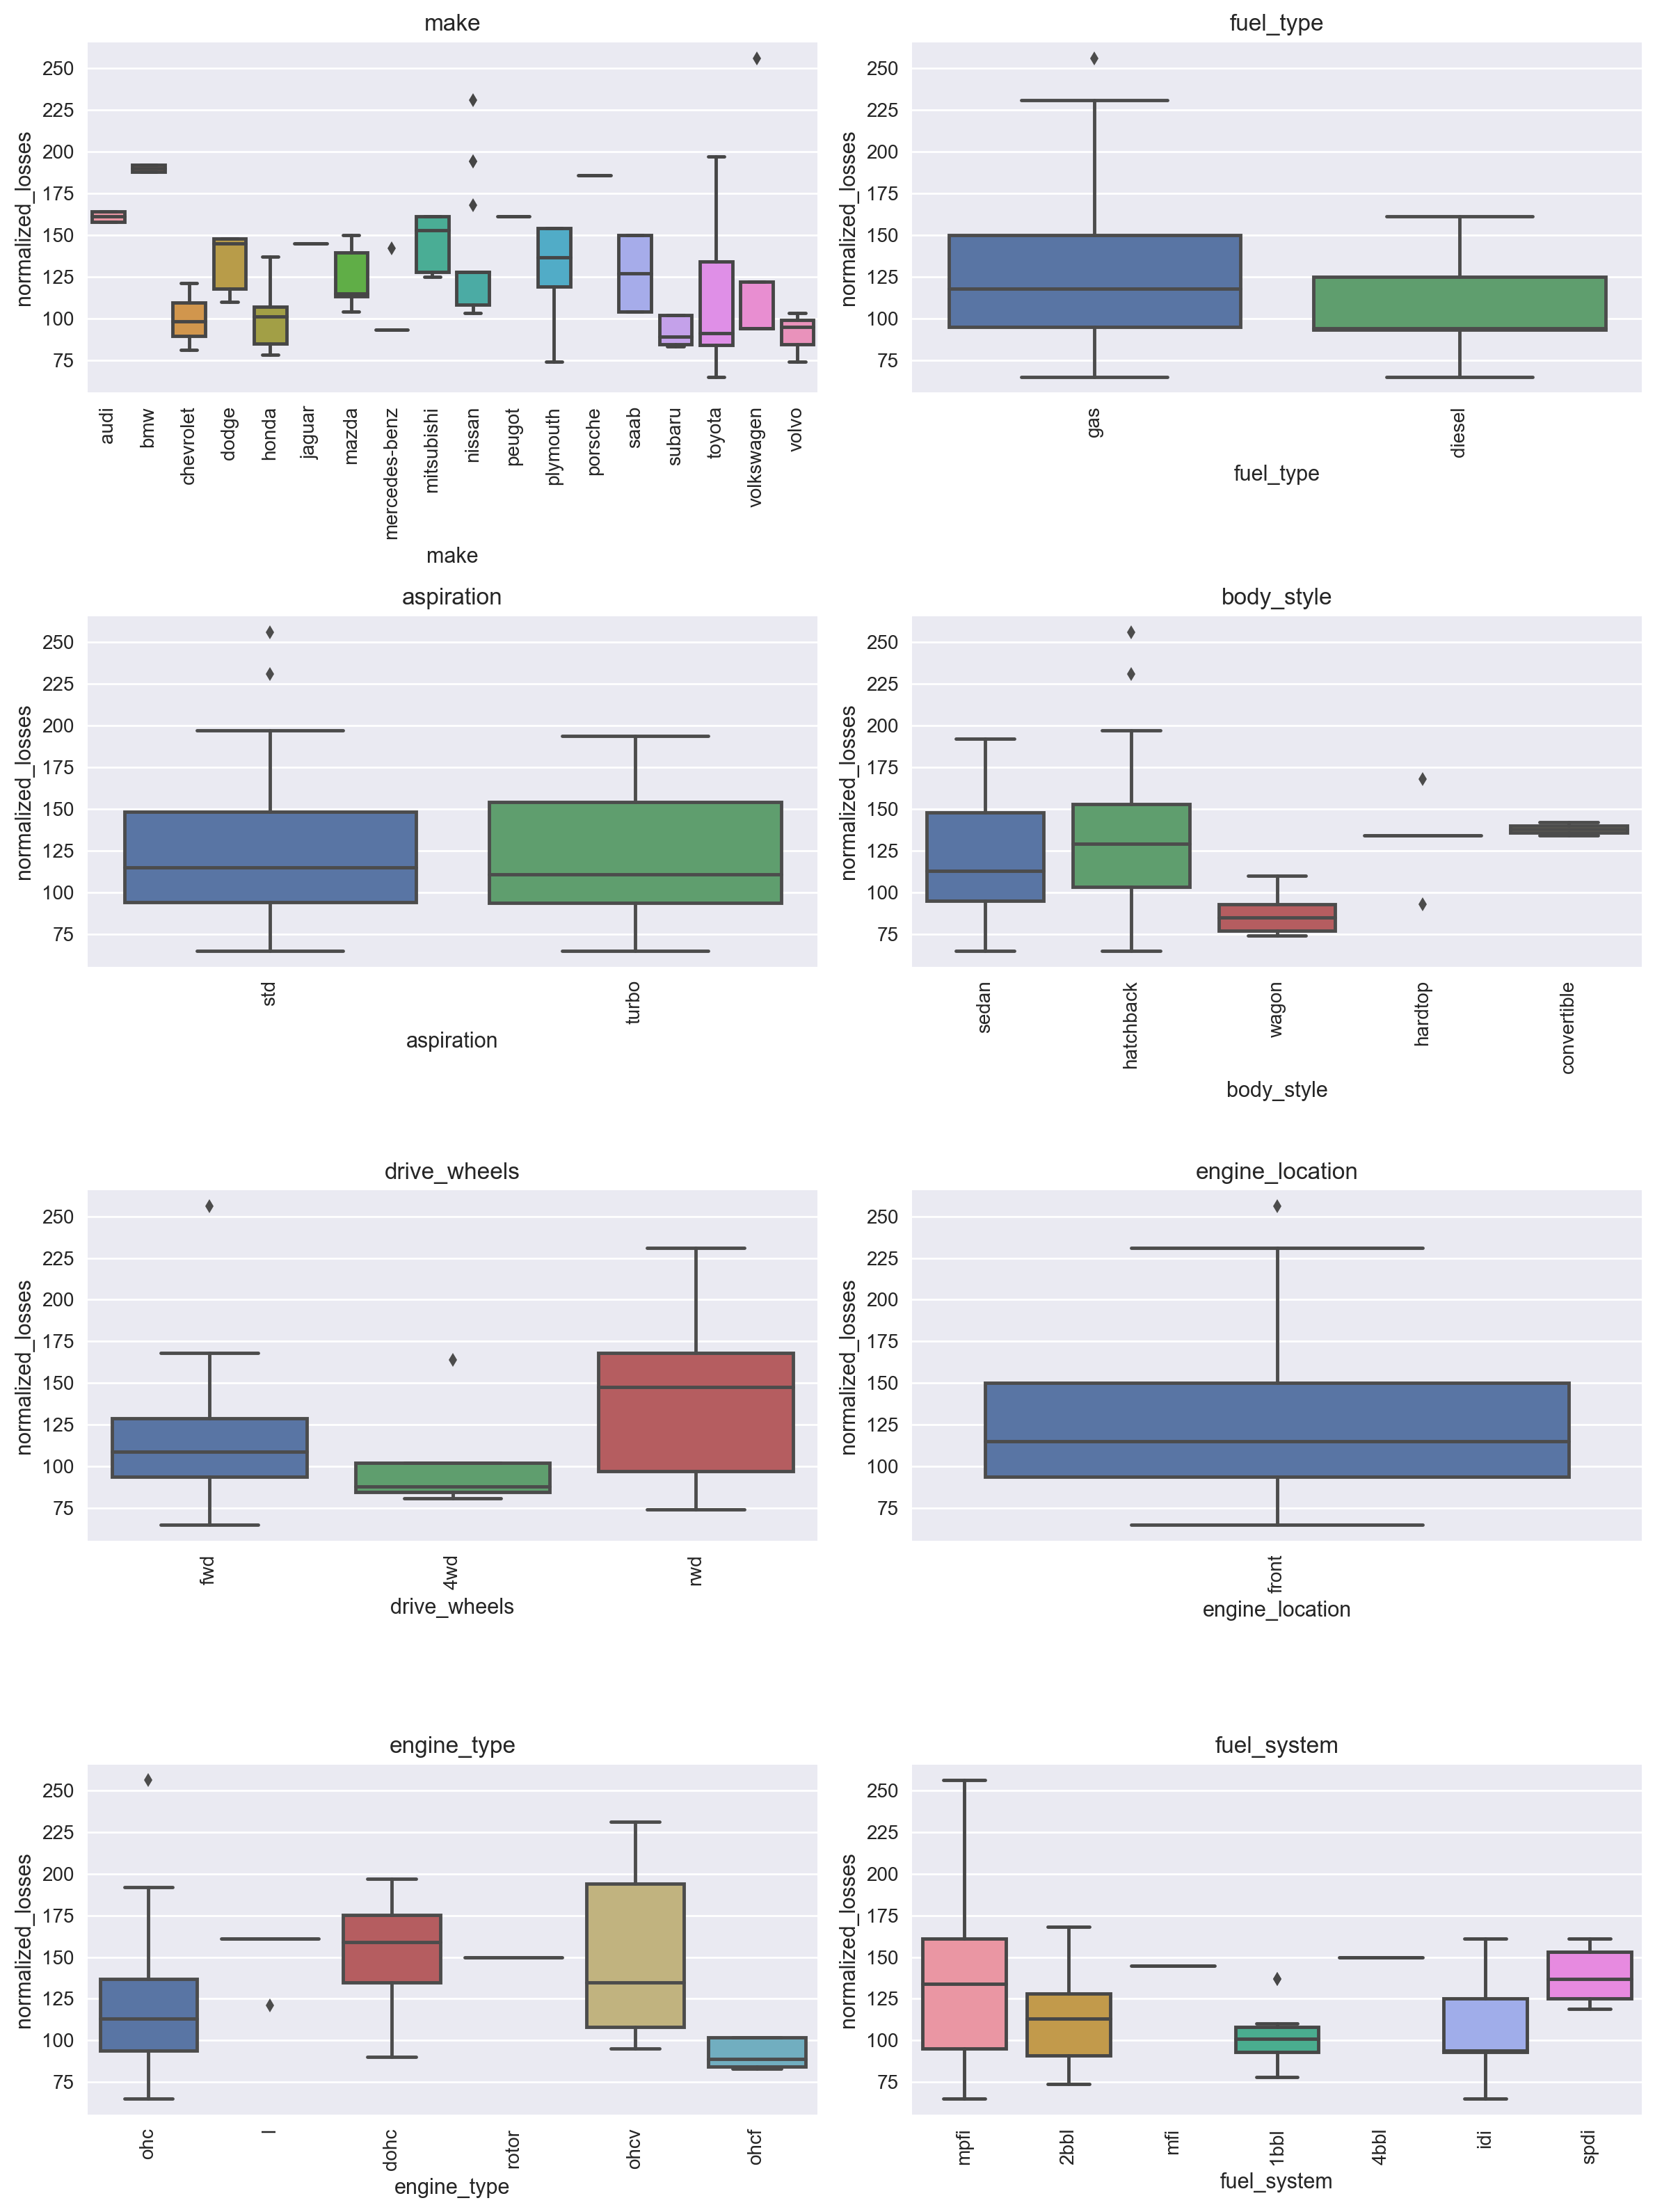

In [30]:
box_plot(dfX, dfy, categorical)

### numeric features distribution

In the case of numeric, I searched for right(or left)skewed distribution then transformed to get close to normal distribution using log or squared.

In [31]:
def dist_plot(df, feature):
    plt.figure(figsize=(10,24), dpi=150)
    for i in range(len(feature)):
        plt.subplot(8, 2, i+1)
        sns.distplot(df[feature[i]], fit = sp.stats.norm, color="deepskyblue")
        plt.tight_layout()

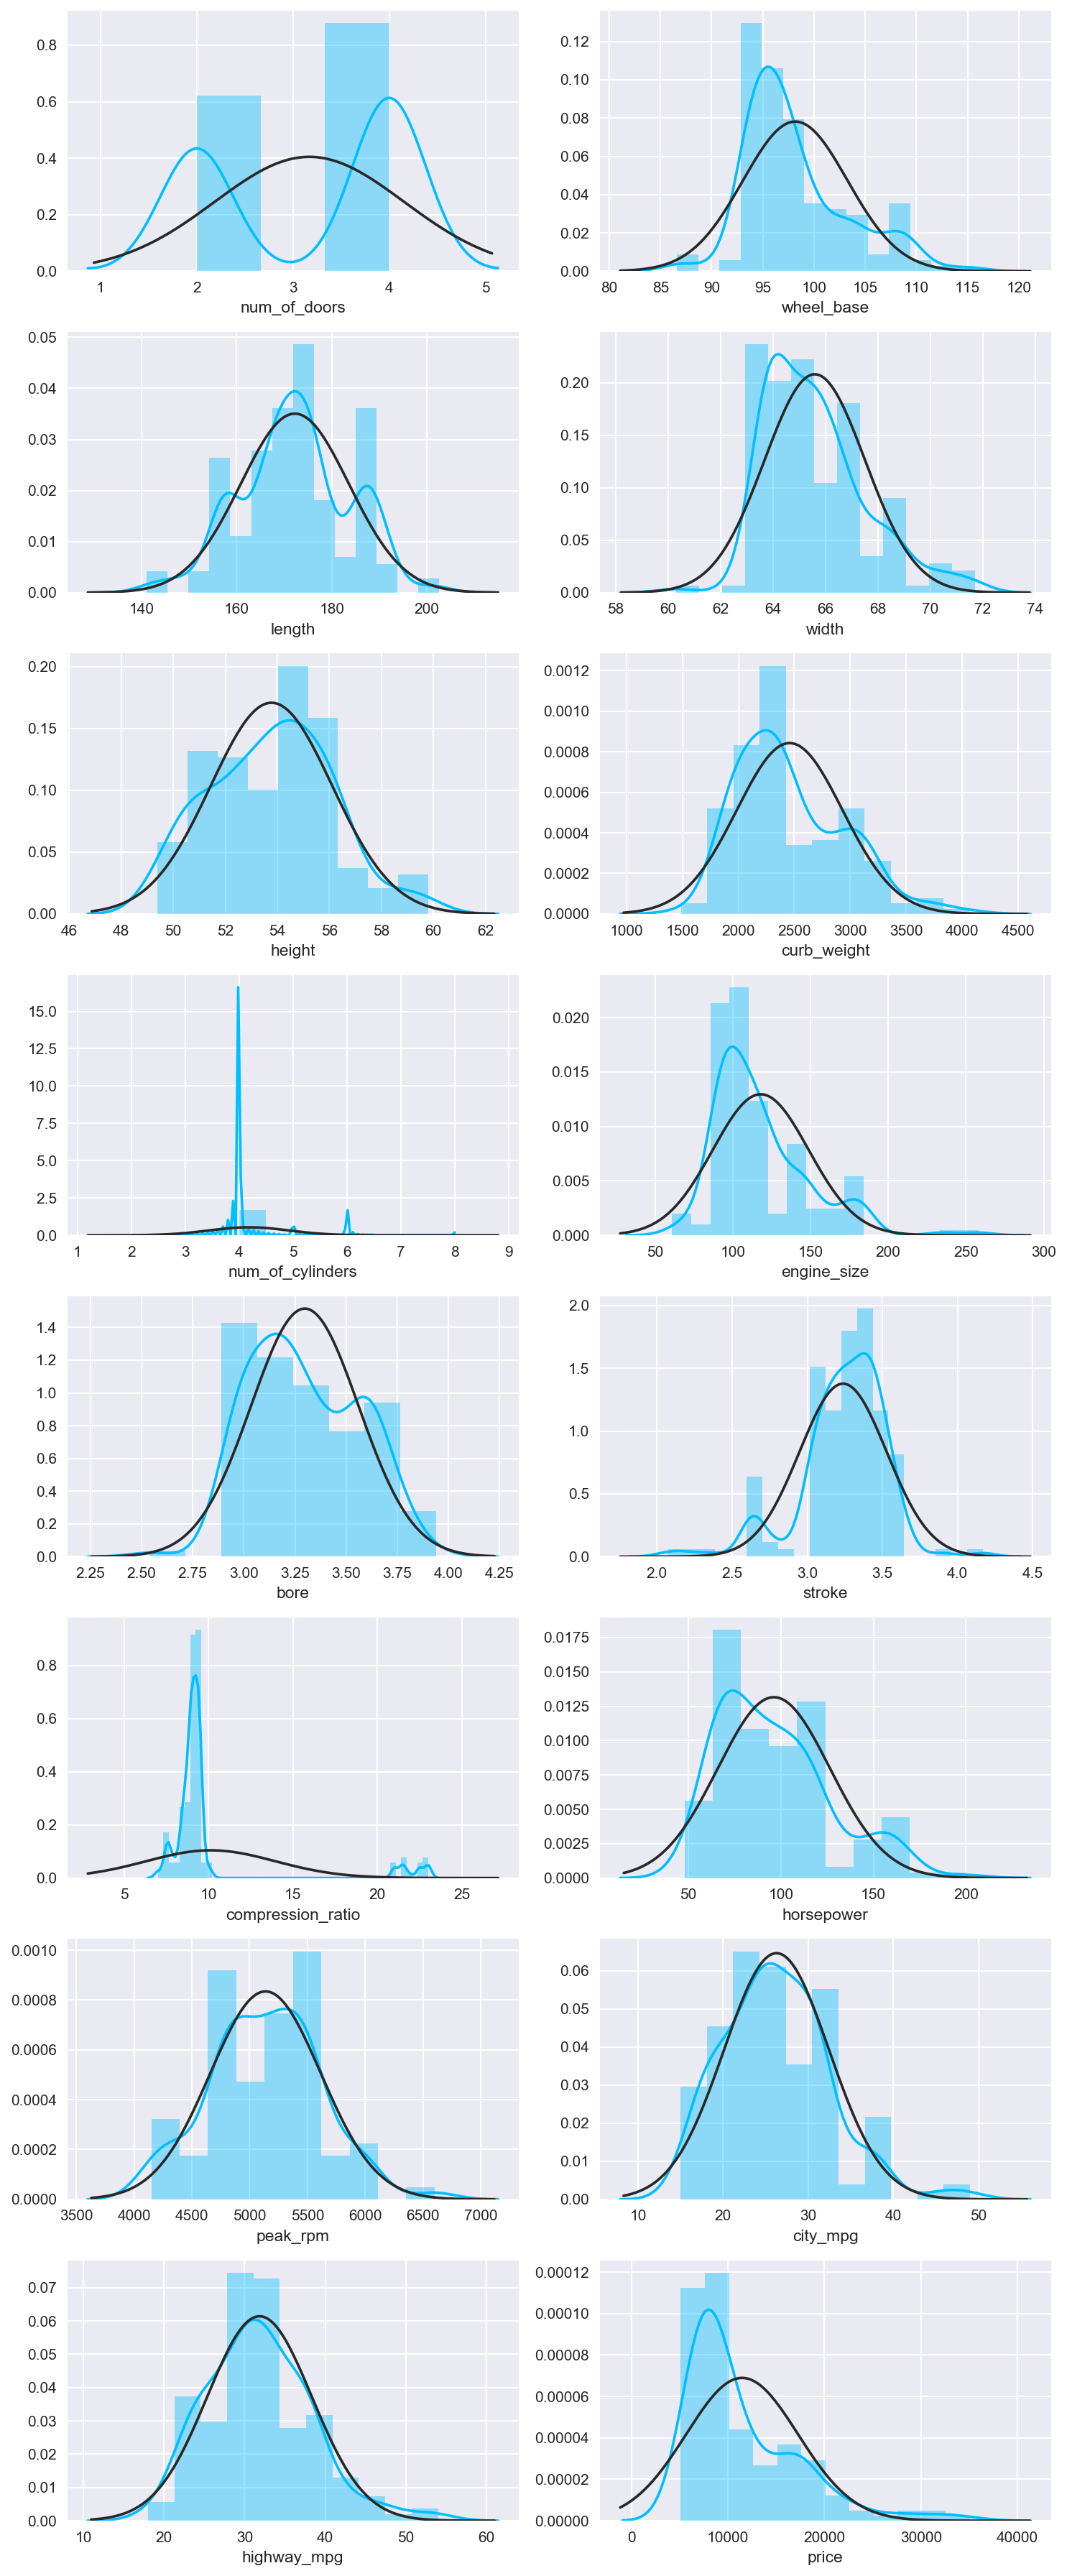

In [32]:
dist_plot(dfX, numeric)
# "wheel_base", "width", "curb_weight", "engine_size", "num-of-cylinders", "horsepower", "price"

In [33]:
# log / ^4 transformation
dfX2[["wheel_base", "width", "curb_weight", "engine_size", "num_of_cylinders", "horsepower", "price"]] = np.log1p(dfX2[["wheel_base", "width", "curb_weight", "engine_size", "num_of_cylinders", "horsepower", "price"]])
dfX2[["stroke"]] = dfX2[["stroke"]]**4

In [34]:
# function making correlation matrix 
def corrmatrix(df):
    corrmat = df.corr()
    plt.subplots(figsize=(12, 12), dpi=200)
    sns.heatmap(corrmat, square=True, cmap='coolwarm', annot=True)

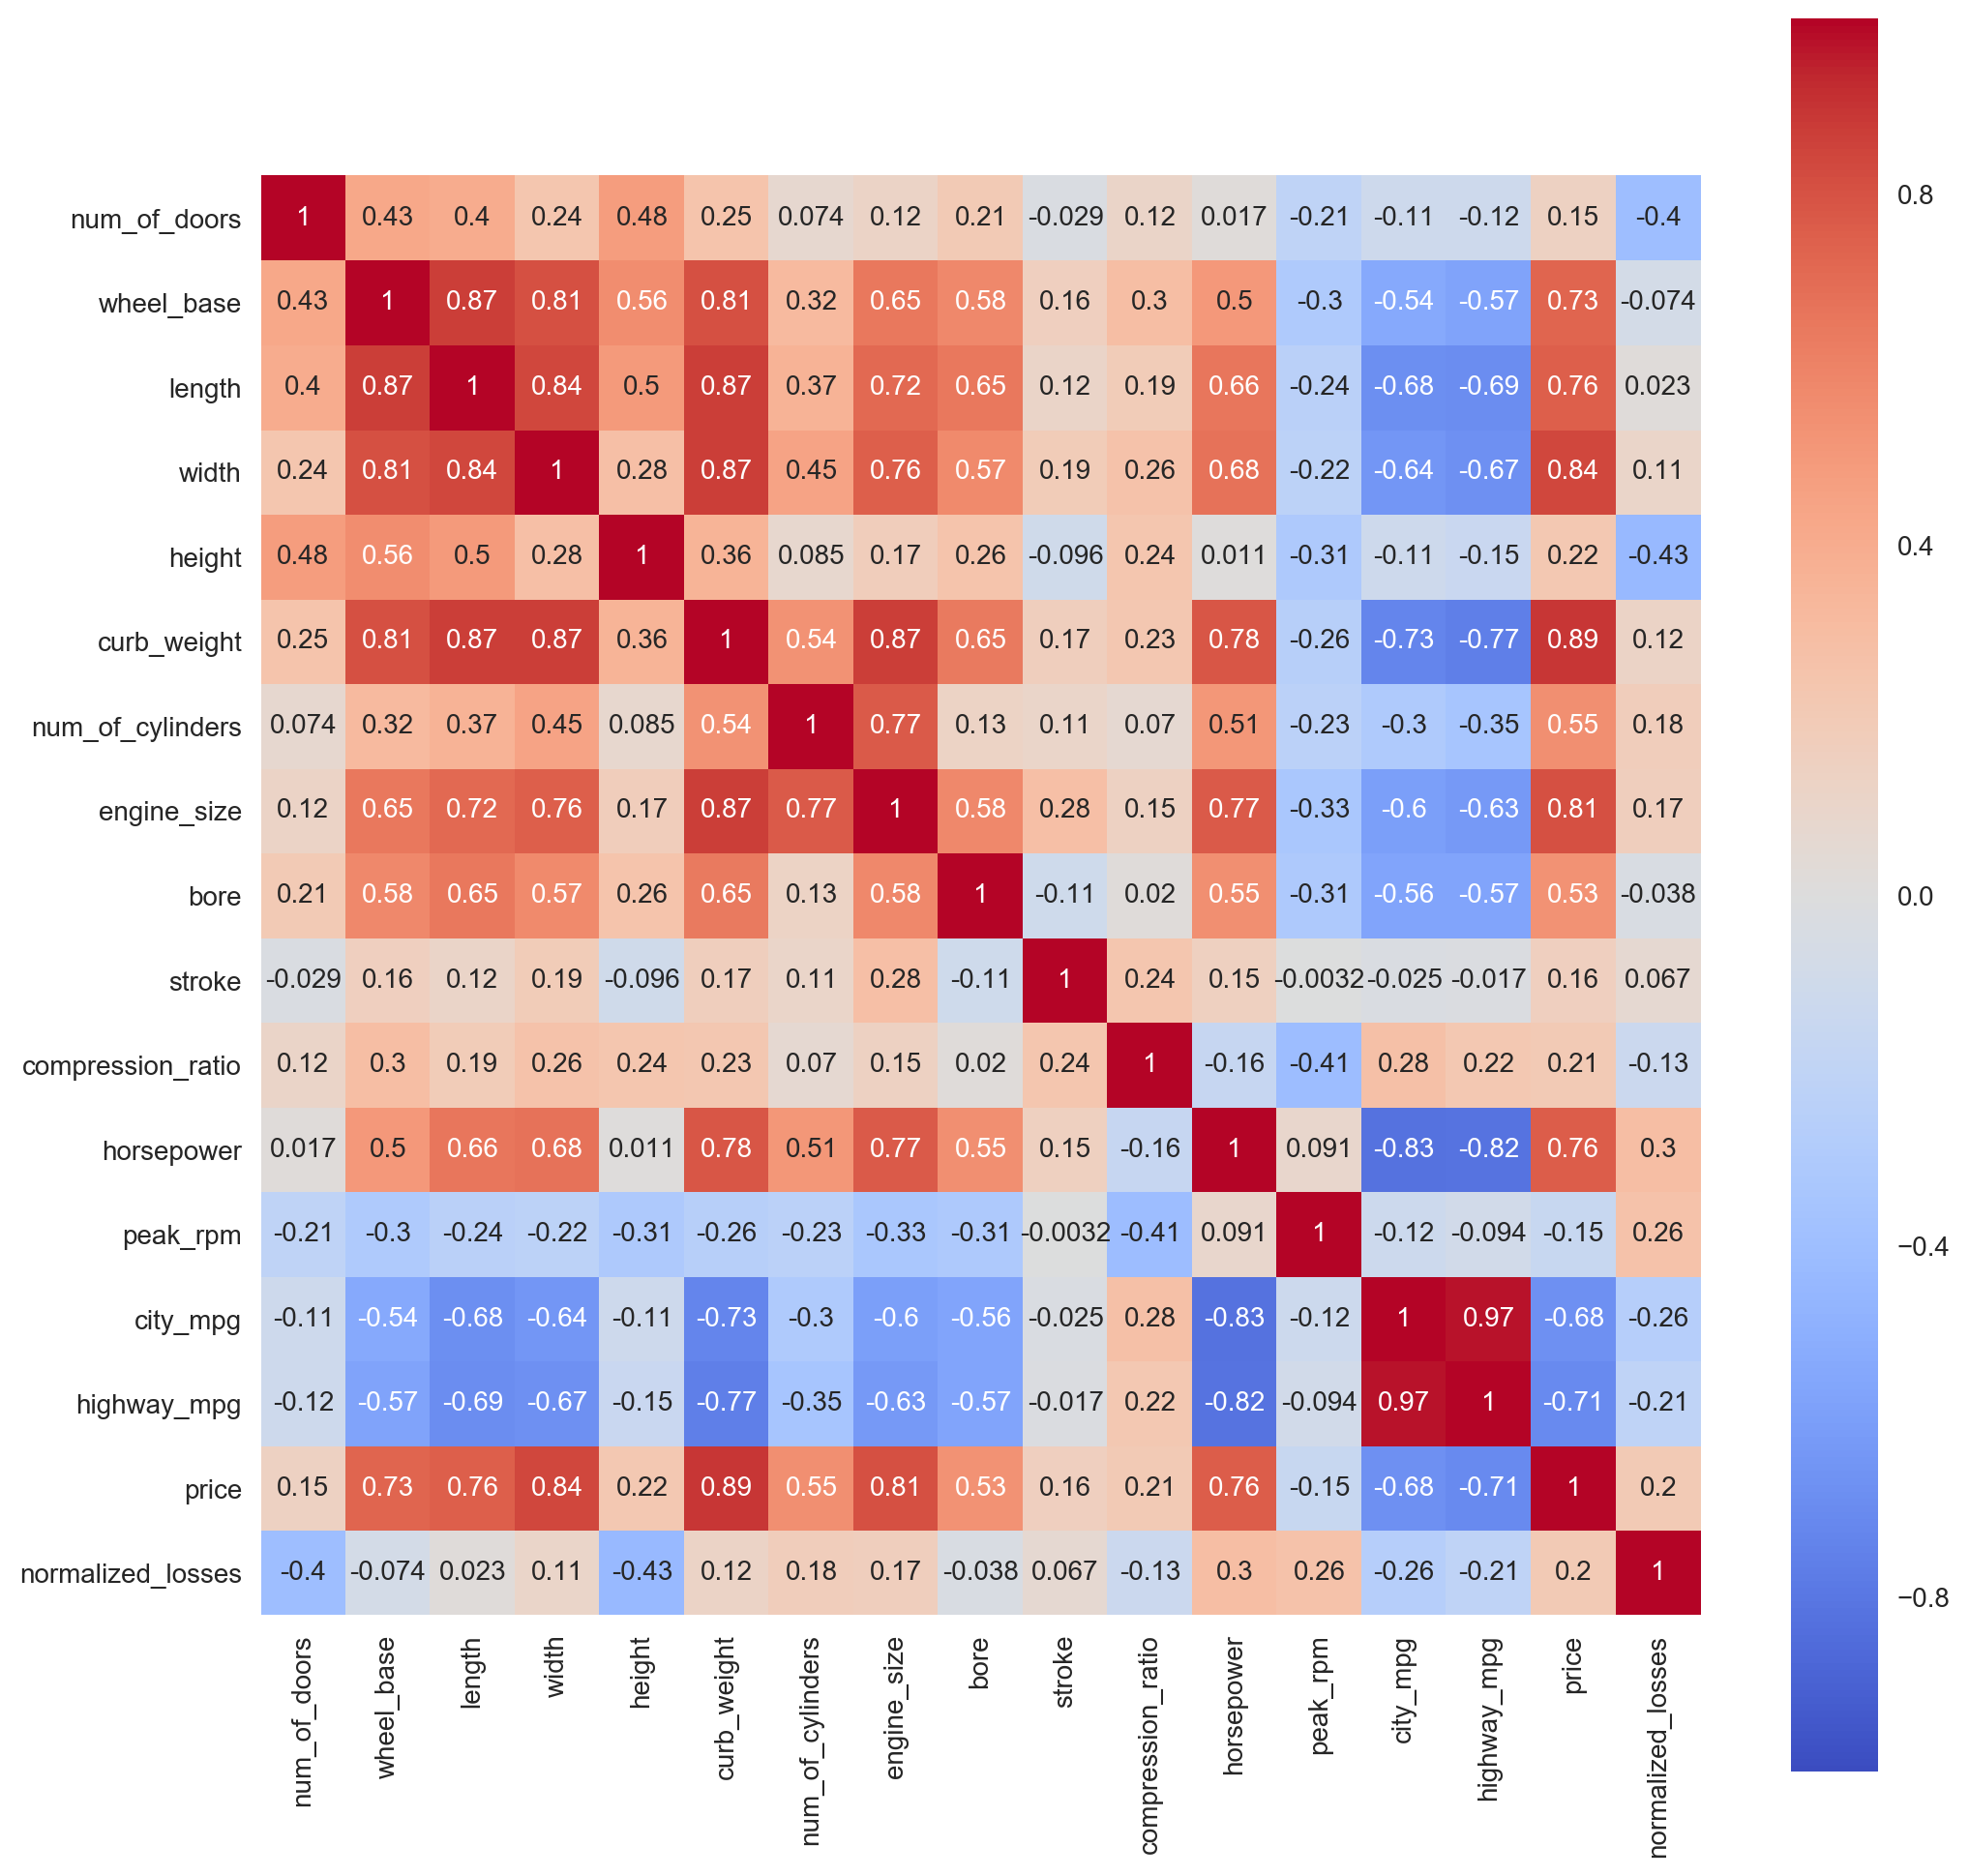

In [35]:
corrmatrix(pd.concat([dfX, dfy], axis=1))

Above plot is the heat map showing coefficient of correlation. I was not sure if these coefficient correlations were statistically significant. and thought that there may be some problems in multicollinearity(if there is a strong relationship between independent variables.) Also, seeing the correlation between target variable and independence variable, I found out which variables would be most influential.

In [36]:
# remove engine_location
dfX2 = dfX2.drop("engine_location", axis=1)

# Data preprocessing

### train / test data split

Next, data preprocessing step. I splited 80% of train set and 20% of test set was divided.

In [37]:
# this is for reindexing 
def idx_sort(df):
    df = df.reset_index()
    df = df.iloc[:, 1:]
    return df

dfX2 = idx_sort(dfX2)
dfy2 = idx_sort(dfy2)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX2, dfy2,  test_size=0.20, random_state=3)

### Imputation NaN values

There are other ways to do this like mean, regression….  I used median value because it is commonly used and to avoid effects of outlier. 

In [39]:
def missing(df):
    missing_pct = df.isnull().sum()
    missing_pct = missing_pct.sort_values(ascending=False)
    plt.figure(figsize=(5,7), dpi=100)
    sns.barplot(y=missing_pct.index, x=missing_pct.values, alpha=0.9, color="r")
    plt.xlabel("Missing_pct", fontsize=12)
    plt.title("Missing values in each column", fontsize=15)

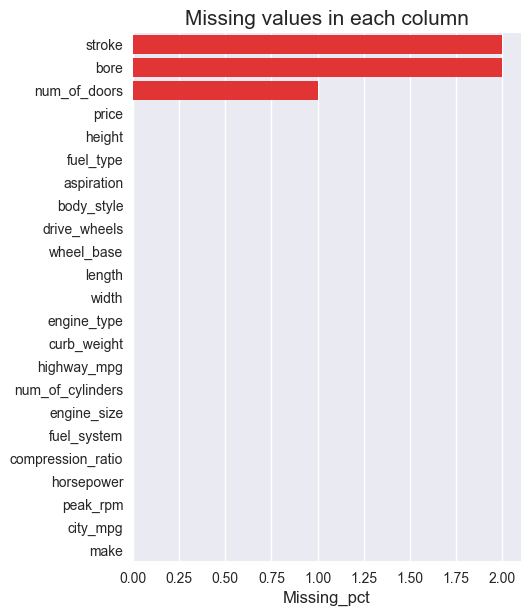

In [40]:
missing(X_train)

#### num-of-doors

I did replace this with median

In [41]:
X_train[X_train["num_of_doors"].isnull()]

make fuel_type aspiration  num_of_doors body_style drive_wheels  \
17  dodge       gas      turbo           NaN      sedan          fwd   

    wheel_base  length     width  height  curb_weight engine_type  \
17    4.550714   157.3  4.171306    50.6      7.69257         ohc   

    num_of_cylinders  engine_size fuel_system  bore      stroke  \
17          1.609438      4.59512        mpfi  3.03  132.068362   

    compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg     price  
17                7.6    4.634729    5500.0      24.0         30.0  9.054739

#### stroke, bore 

I found out Stroke, bore are releated to Engine. So I didn't like just to replace these values with median of all data. I tried to used median depending on their engine type, rotor. But all of data which has rotor as engine type also have missing values on Stroke, bore. So, I did replace stroke and bore with median values. 

In [42]:
X_train[X_train["stroke"].isnull()]

make fuel_type aspiration  num_of_doors body_style drive_wheels  \
40  mazda       gas        std           2.0  hatchback          rwd   
39  mazda       gas        std           2.0  hatchback          rwd   

    wheel_base  length     width  height  curb_weight engine_type  \
40    4.567468   169.0  4.200205    49.6     7.775276       rotor   
39    4.567468   169.0  4.200205    49.6     7.775276       rotor   

    num_of_cylinders  engine_size fuel_system  bore  stroke  \
40          1.098612      4.26268        4bbl   NaN     NaN   
39          1.098612      4.26268        4bbl   NaN     NaN   

    compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg     price  
40                9.4    4.624973    6000.0      17.0         23.0  9.379746  
39                9.4    4.624973    6000.0      17.0         23.0  9.300729

In [43]:
X_train[X_train["engine_type"]=="rotor"]

make fuel_type aspiration  num_of_doors body_style drive_wheels  \
40  mazda       gas        std           2.0  hatchback          rwd   
39  mazda       gas        std           2.0  hatchback          rwd   

    wheel_base  length     width  height  curb_weight engine_type  \
40    4.567468   169.0  4.200205    49.6     7.775276       rotor   
39    4.567468   169.0  4.200205    49.6     7.775276       rotor   

    num_of_cylinders  engine_size fuel_system  bore  stroke  \
40          1.098612      4.26268        4bbl   NaN     NaN   
39          1.098612      4.26268        4bbl   NaN     NaN   

    compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg     price  
40                9.4    4.624973    6000.0      17.0         23.0  9.379746  
39                9.4    4.624973    6000.0      17.0         23.0  9.300729

In [44]:
# handle missing values on stroke, bore, num-of-doors , to minimize outlier's effect, use median 
imr_median = Imputer(missing_values="NaN", strategy="median", axis=0)
imr = imr_median.fit(X_train[["num_of_doors", "bore", "stroke"]])
X_train[["num_of_doors", "bore", "stroke"]] = imr.transform(X_train[["num_of_doors", "bore", "stroke"]])
X_test[["num_of_doors", "bore", "stroke"]] = imr.transform(X_test[["num_of_doors", "bore", "stroke"]])

/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sinsanghun/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

## Standardization for numeric variable

After that Numeric variables were standardized and category variables were One-hot-Encoded

In [45]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std = std.fit(X_train[numeric])
X_train_std = pd.DataFrame(std.transform(X_train[numeric]), columns=numeric)
X_test_std = pd.DataFrame(std.transform(X_test[numeric]), columns=numeric)

## One Hot Encoding for categorical variables

In [46]:
# because of removing engine_location 
categorical = ["make", "fuel_type", "aspiration",  "body_style", "drive_wheels","engine_type", "fuel_system"]

In [47]:
dummy_categorical = pd.get_dummies(dfX2[categorical])
X_train_cat = dummy_categorical.loc[X_train.index]
X_test_cat = dummy_categorical.loc[X_test.index]

In [48]:
X_train_cat = idx_sort(X_train_cat)
X_test_cat = idx_sort(X_test_cat)

In [49]:
X_train = pd.concat([X_train_std, X_train_cat], axis=1)
X_test = pd.concat([X_test_std, X_test_cat], axis=1)

In [50]:
y_train = idx_sort(y_train)
y_test = idx_sort(y_test)

----

# Linear regression

In [51]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_losses   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     9.212
Date:                Fri, 01 Sep 2017   Prob (F-statistic):           3.39e-18
Time:                        13:05:51   Log-Likelihood:                 103.74
No. Observations:                 131   AIC:                            -107.5
Df Residuals:                      81   BIC:                             36.28
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
num_of_doors              -0

This report shows high R-squared score and statistically significant p-value of F statistics. There are two major problems I should solve. First, There are many coefficients of features which is not statistically significant. Second, I can comfirm multicollinearity problem on this summary report.



In [52]:
def pred_plot(X, y , model):
    plt.figure(figsize=(10, 4), dpi=150)
    plt.subplot(121)
    plt.scatter(y, model.predict(X), color="lightseagreen", alpha=0.7)
    plt.xlabel("actual value")
    plt.ylabel("predicted value")
    plt.title("actual-predict value")
    
    # residual plot 
    plt.subplot(122)
    plt.scatter(model.predict(X), model.resid, c="deepskyblue", alpha=0.7)
    plt.hlines(y=0, xmin=min(model.predict(X)), xmax=max(model.predict(X)), lw=2, color="red", alpha=0.7)
    plt.xlabel("Predicted Value")
    plt.ylabel("Residuals")
    plt.title("Predicted - Residual")
    
    plt.tight_layout()
    plt.show()

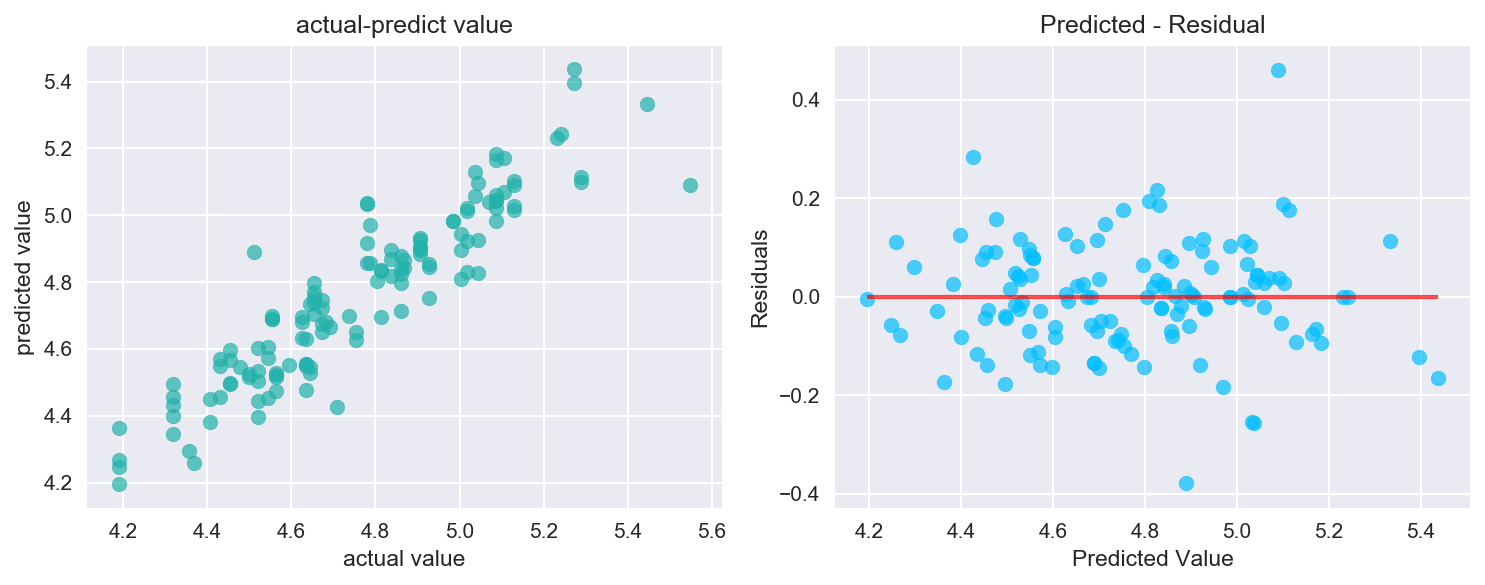

In [53]:
pred_plot(X_train, y_train, model)

seeing plot between the actual value and predicted value, residual plot, there were some outliers.

###  Outliers through leverage and residuals

I analyzed the outlier using leverage and residual. Normally, in regression analysis, if leverage and residual are both big, they are considered as outlier. By this, using the cooks distance and Fox’s recommendation criterion, I deicided outliers.

In [54]:
influence = model.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y_train) - model.df_model - 1)
print("Fox's recommendation criterion :", fox_cr)
idx = np.where(cooks_d2 > fox_cr)[0]

Fox's recommendation criterion : 0.0493827160494


/Users/sinsanghun/anaconda/lib/python2.7/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: divide by zero encountered in divide
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Users/sinsanghun/anaconda/lib/python2.7/site-packages/statsmodels/stats/outliers_influence.py:403: RuntimeWarning: divide by zero encountered in divide
  cooks_d2 *= hii / (1 - hii)


If data's cooks distance is greater than fox's recommendation criteria, data is defined outlier.

In [55]:
X_outlier = X_train.iloc[idx, :]
y_outlier = y_train.iloc[idx]

In [56]:
print("the numer of outliers : ", len(idx))
print(idx)

the numer of outliers :  12
[  7  25  33  64  70  80  89  99 103 104 121 129]


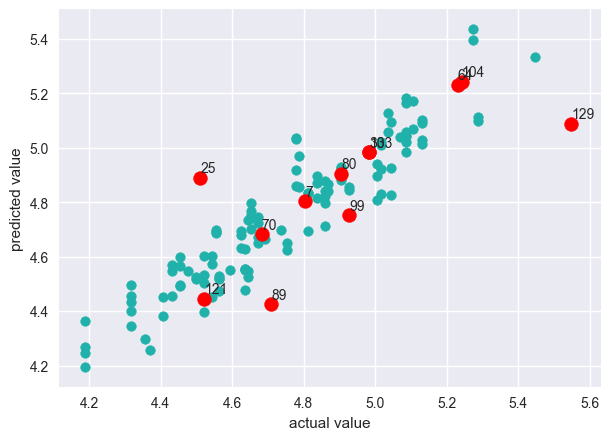

In [57]:
plt.figure(figsize=(7, 5), dpi=100)
plt.scatter(y_train, model.predict(X_train), color="lightseagreen")
plt.scatter(y_outlier, model.predict(X_outlier), color="red", s=100)
for i in range(len(idx)):
    plt.annotate(str(idx[i]), xy=(y_outlier.iloc[i], model.predict(X_outlier).iloc[i]), 
                 xytext=(y_outlier.iloc[i], model.predict(X_outlier).iloc[i]+0.02))
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.show()

This red dot is the outlier in this plot.

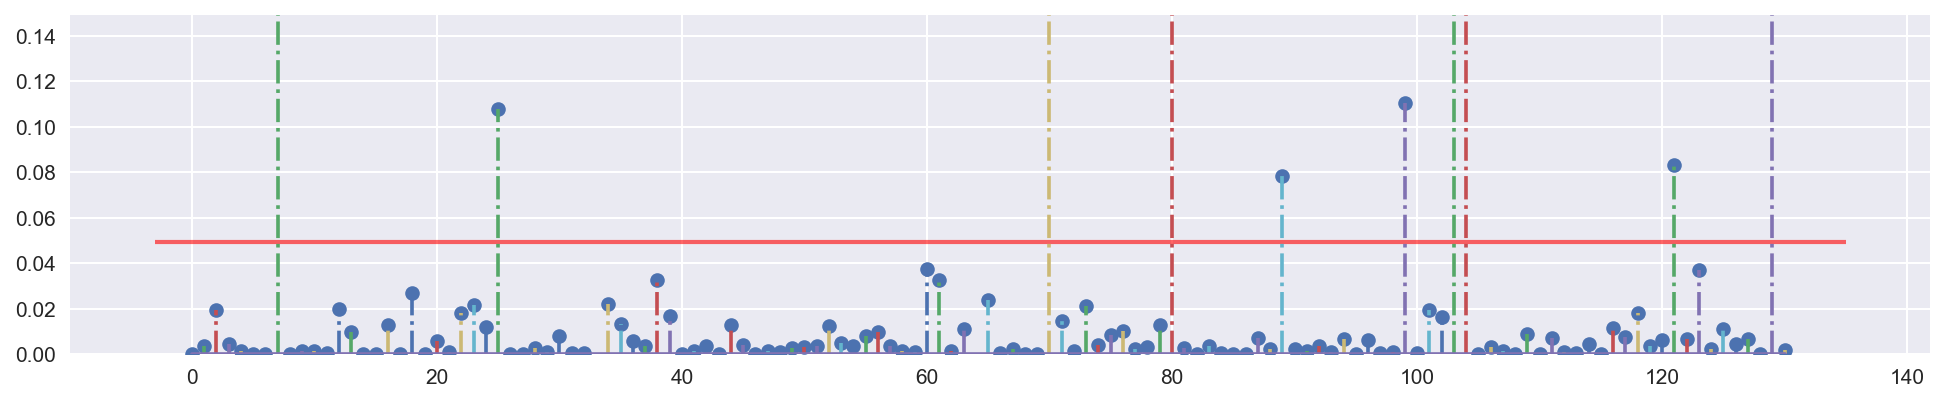

In [58]:
# cooks_d2 
plt.figure(figsize=(16, 3), dpi=150)
plt.stem(cooks_d2, "-.")
plt.ylim([0, fox_cr + 0.1])
plt.hlines(y=fox_cr, xmin=-3, xmax=135, lw=2, color="red",alpha=0.6)
plt.show()

And in this stem plot, the stems going up higher than the red line means outlier.

In [59]:
resid = zscore(model.resid)**2
leverage = influence.hat_matrix_diag

out = pd.DataFrame({"index" : idx, "resid" : resid[idx].round(3), "leverage" : leverage[idx].round(3)})
out

index  leverage   resid
0       7     1.000   0.000
1      25     0.357  11.933
2      33     1.000   0.000
3      64     1.000   0.000
4      70     1.000   0.000
5      80     1.000   0.000
6      89     0.399   6.743
7      99     0.615   2.553
8     103     1.000   0.000
9     104     1.000   0.000
10    121     0.778   0.501
11    129     0.445  17.588

At this point, I didn't regard data which has 0 resid as outlier. Because It is only one value of all data and has strong power to explain the data. 

In [60]:
idx = out[out["resid"]!=0]["index"]
idx = np.array(idx)

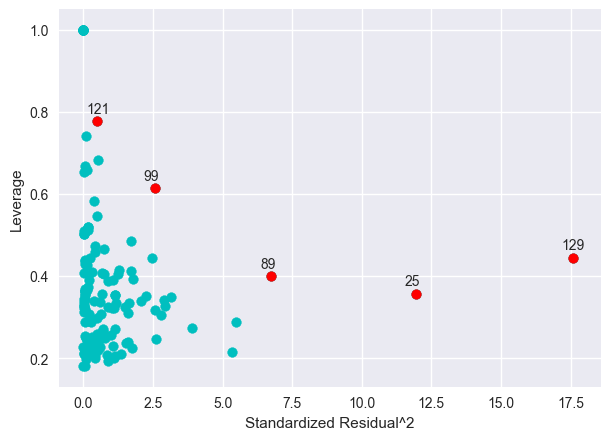

In [61]:
# to see leverange and residuals simultaneously
fig, ax = plt.subplots(figsize=(7,5), dpi=100)

plt.scatter(resid, leverage, color="c")

# for outlier data 
for i in idx:
    plt.scatter(resid[i], leverage[i], color="red")
    plt.annotate(str(i), xy=(resid[i], leverage[i]), xytext=(resid[i]-0.4, leverage[i]+0.02))

plt.xlabel("Standardized Residual^2")
plt.ylabel("Leverage")
plt.show()


And by the scatter plot between leverage and square residual, I found out that outlier is placed in these lines.

In [62]:
y_train = y_train.drop(idx)
y_train = idx_sort(y_train)
X_train = X_train.drop(idx)
X_train = idx_sort(X_train)

### Regression again after removing outliers

In [63]:
reg = sm.OLS(y_train, X_train).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_losses   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     16.47
Date:                Fri, 01 Sep 2017   Prob (F-statistic):           2.58e-25
Time:                        13:05:55   Log-Likelihood:                 138.11
No. Observations:                 126   AIC:                            -176.2
Df Residuals:                      76   BIC:                            -34.40
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
num_of_doors              -0

After removing the outlier and doing regression analysis again, R2squared score was increased but each coefficient problem and multicollinearity problem were still left behind.

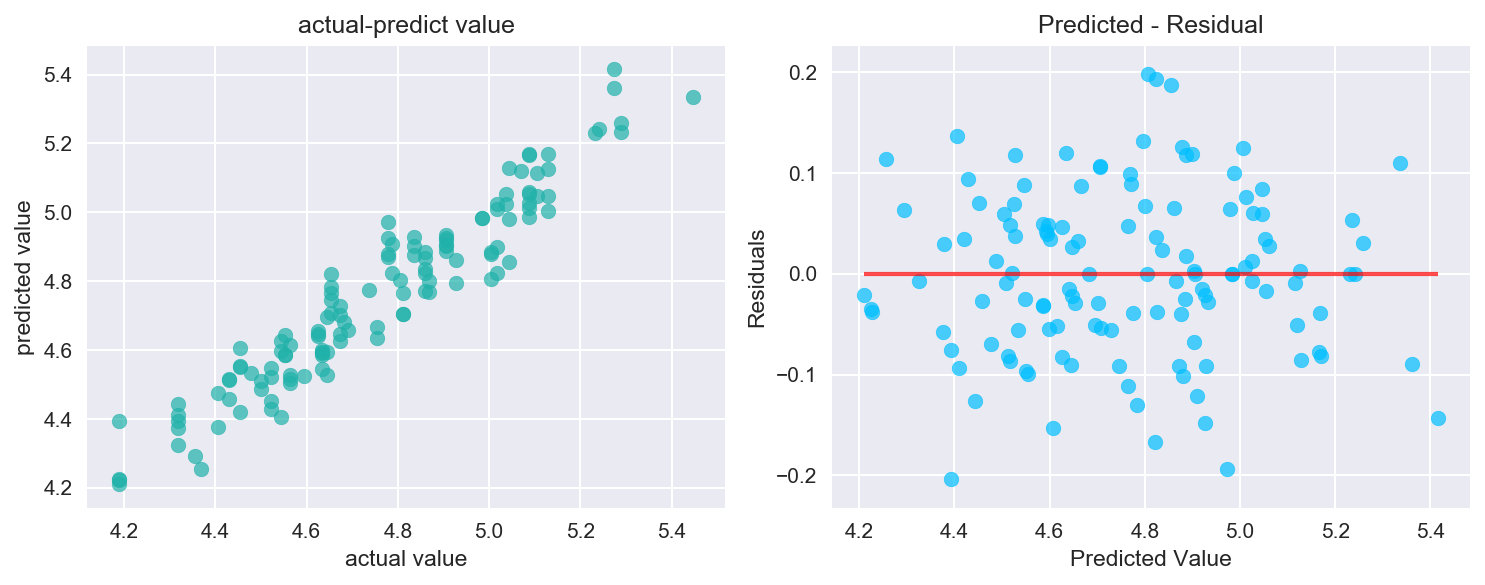

In [64]:
pred_plot(X_train, y_train, reg)

In [65]:
def pred_line_plot(dfy, dfX, model):
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error

    plt.figure(figsize=(12,4), dpi=200)
    pred = model.predict(dfX)
    plt.plot(range(len(dfX)), np.exp(pred), label="PRED", alpha=0.8)
    plt.plot(range(len(dfX)), np.exp(dfy), label="ACTUAL", alpha=0.8)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()

    print("MSE :", mean_squared_error(np.exp(dfy), np.exp(pred)))

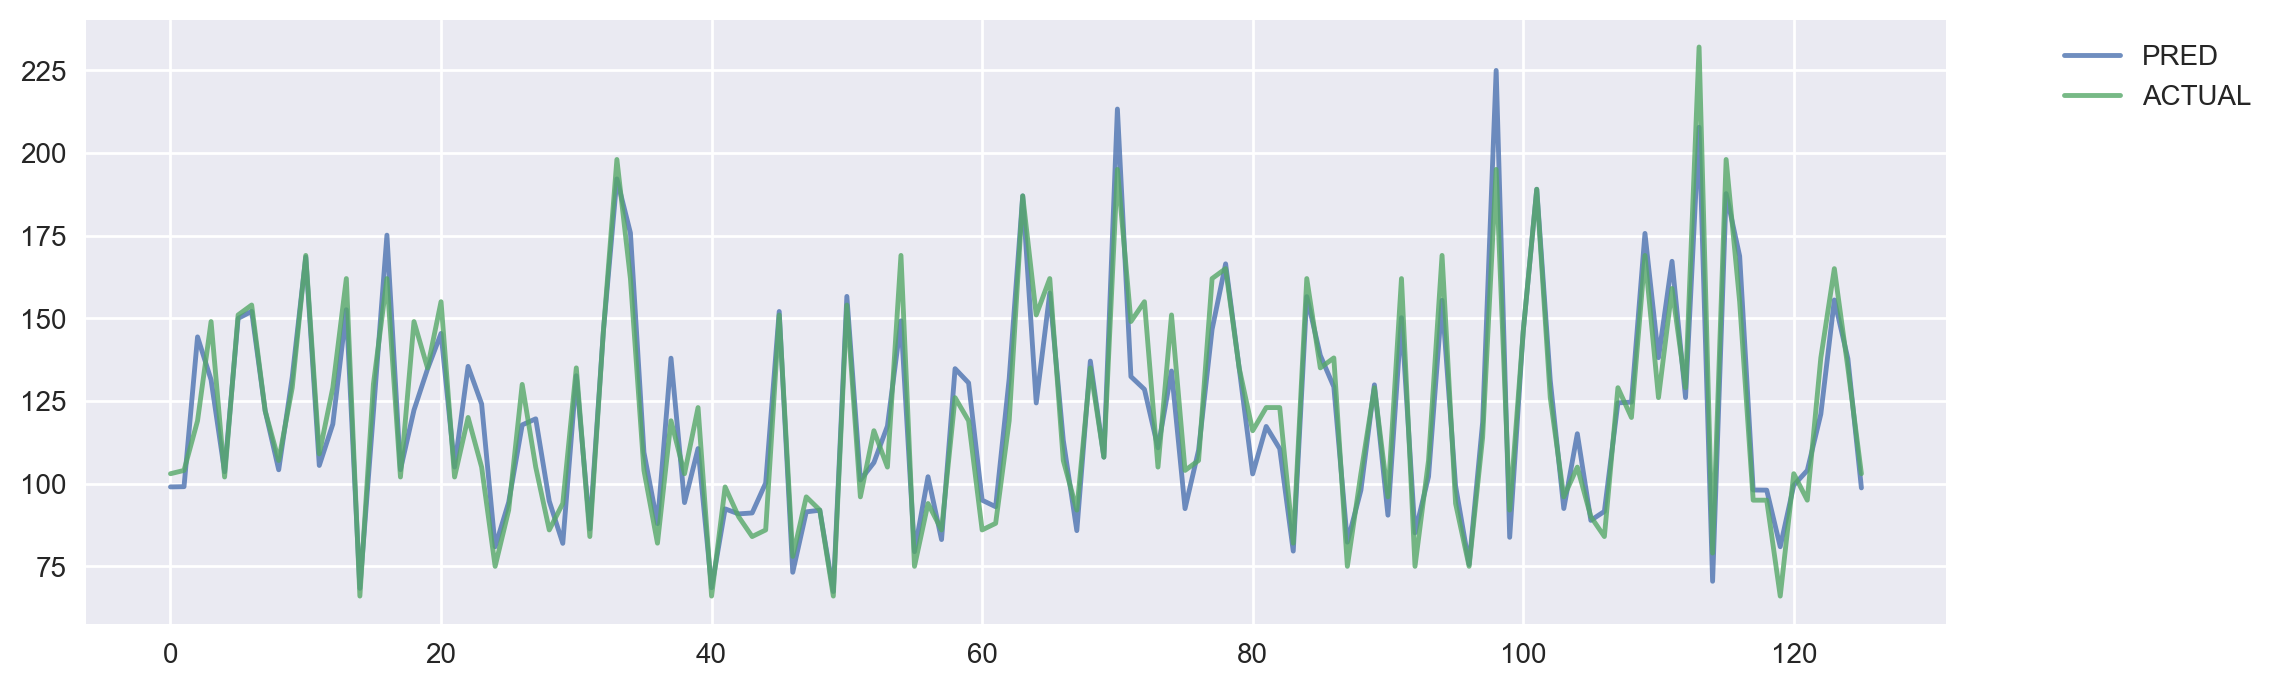

MSE : 104.010234345


In [66]:
pred_line_plot(y_train, X_train, reg)

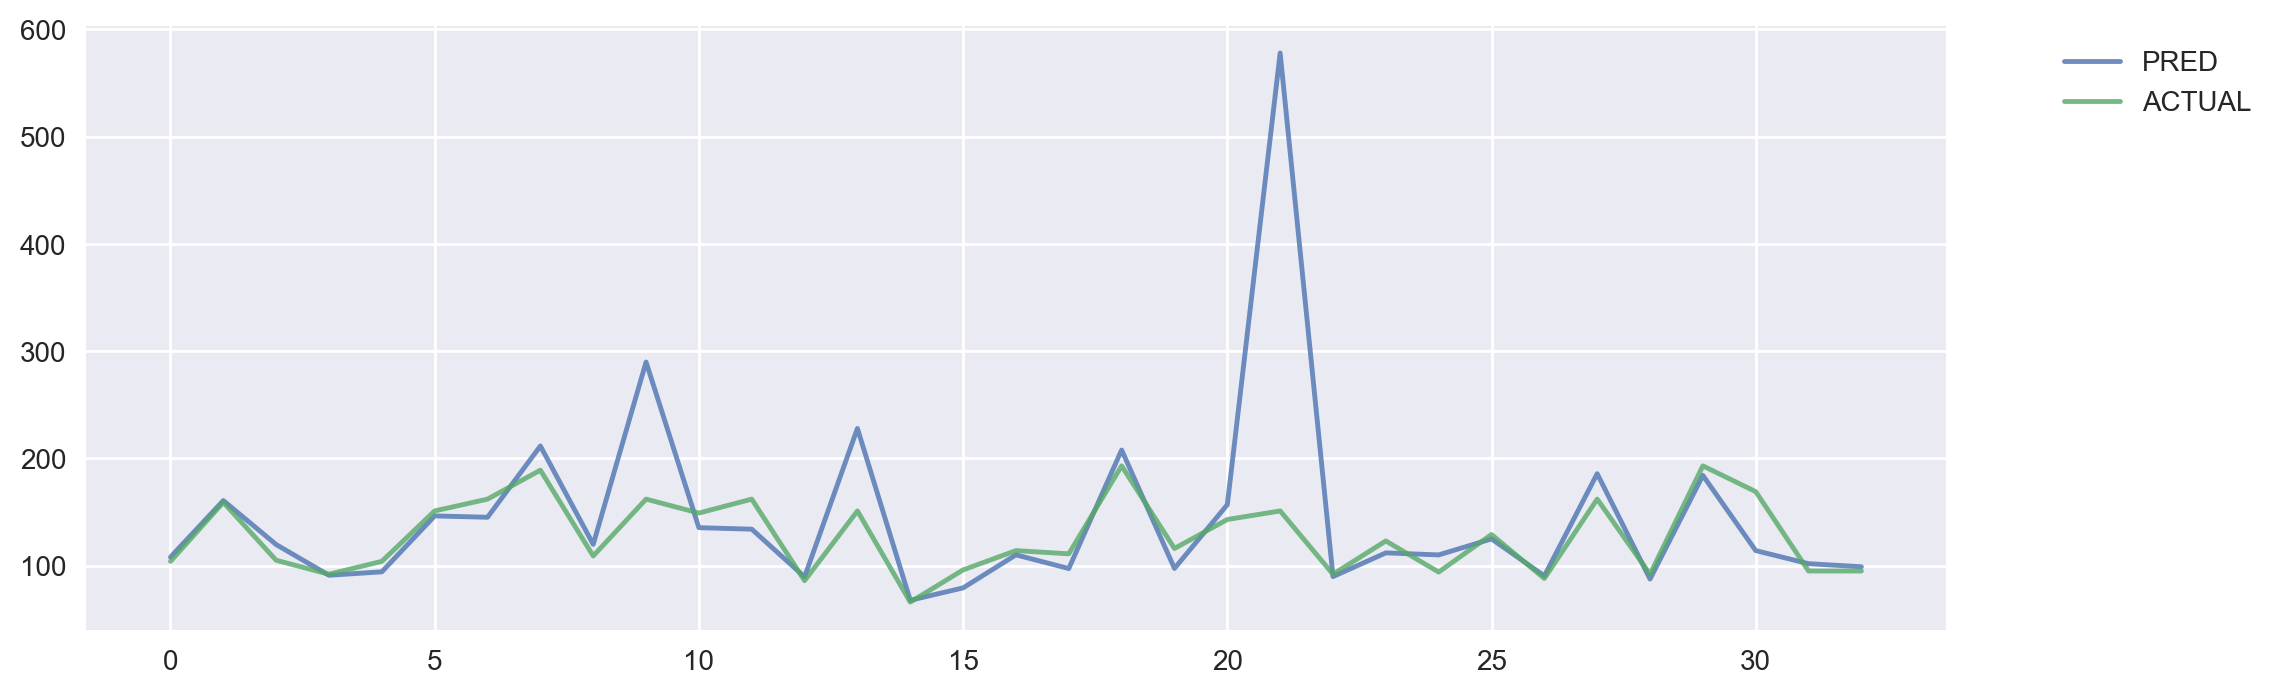

MSE : 6428.16939023


In [67]:
pred_line_plot(y_test, X_test, reg)

The above two graphs show that it is overfitting. To solve the multicollinearity problem and overfitting problems, I decided to use regularized models.

------

# Try to use Regularization model

## Lasso Regression 

### Finding optimal alpha

With the LassoCV, I found the optimal alpha value and plotting it out, although not perfect, the overfitting problems were improved a little.

/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Optimal Alpha :  0.000625055192527


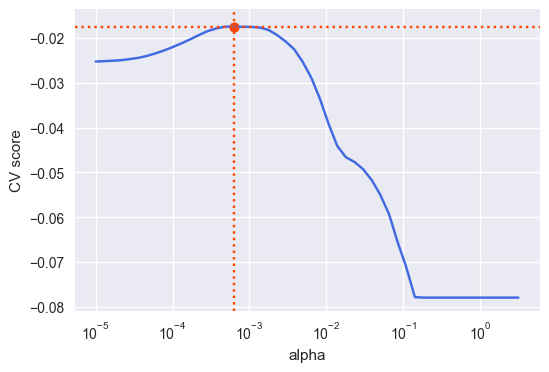

In [68]:
alphas = np.logspace(-5, 0.5, 50)

lasso_cv = LassoCV(alphas=alphas, cv=10)
lasso_cv.fit(X_train, y_train)

print("Optimal Alpha : ", lasso_cv.alpha_ )
optimal_lasso = lasso_cv.alpha_ 

scores = -lasso_cv.mse_path_.mean(axis=1)
plt.figure(dpi=100)
plt.semilogx(lasso_cv.alphas_, scores, color="royalblue")
plt.axhline(np.max(scores), linestyle=':', color="orangered")    
plt.axvline(lasso_cv.alpha_ , linestyle=':',color="orangered")
plt.scatter(lasso_cv.alpha_, np.max(scores), color="orangered")
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()

In [69]:
lasso = LassoCV(alphas = [optimal_lasso]).fit(X_train, y_train)

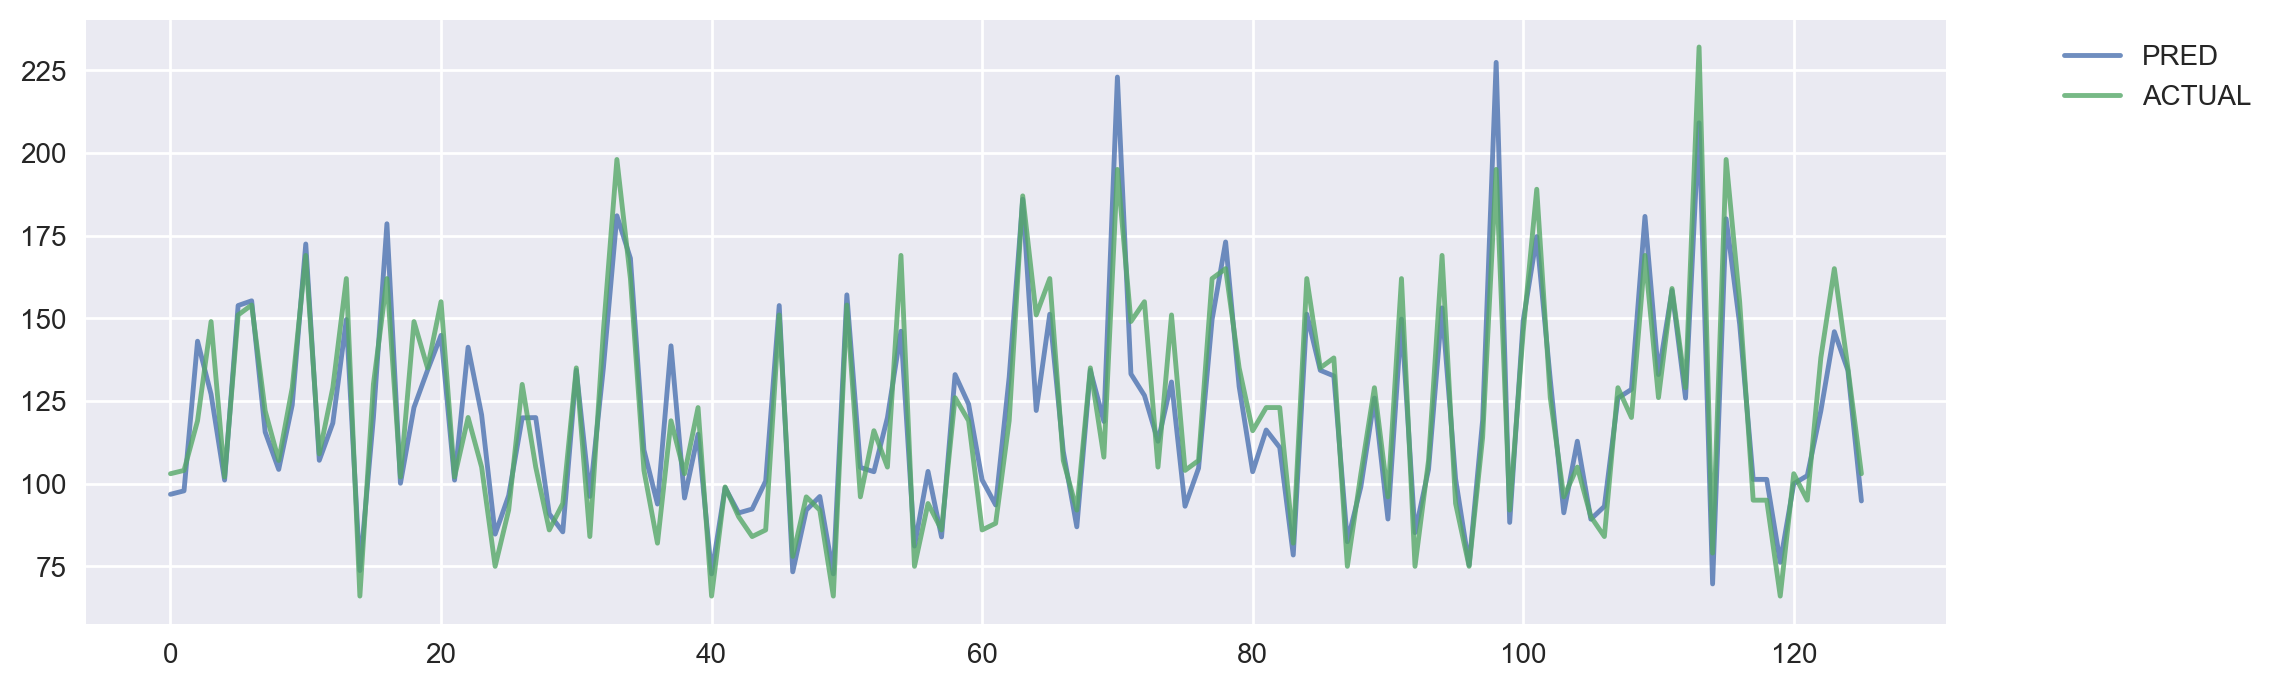

MSE : 127.990025572


In [70]:
pred_line_plot(y_train, X_train, lasso)

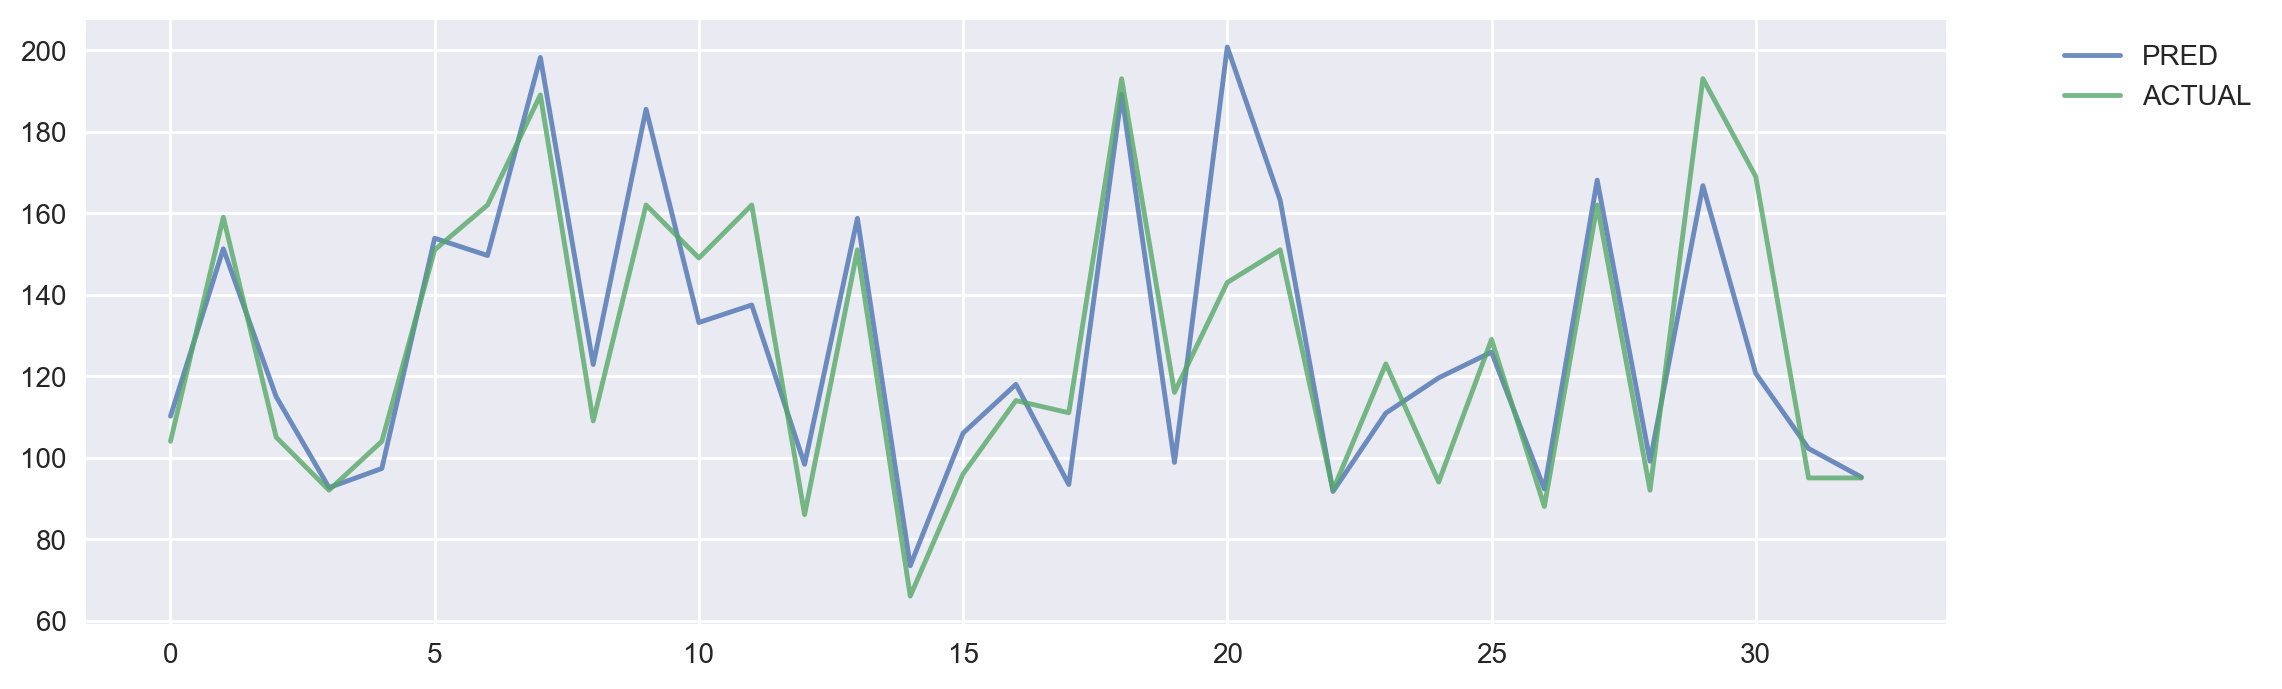

MSE : 320.284153739


In [71]:
pred_line_plot(y_test, X_test, lasso)

### Feature Selection

And I looked at the coefficient using the feature selection which is the lasso model's characteristic. Unlike the other models, coefficients converge into 0 rapidly, leading to like feature selection effect and overfitting or multicollinearity would be handled.

In [72]:
coef = pd.Series(lasso.coef_, index = X_train.columns)

In [73]:
print("--- Feature Selection ---")
print("Lasso picked " + str(sum(coef != 0)) + " variables and removed the other " +  str(sum(coef == 0)) + " variables")

--- Feature Selection ---
Lasso picked 39 variables and removed the other 20 variables


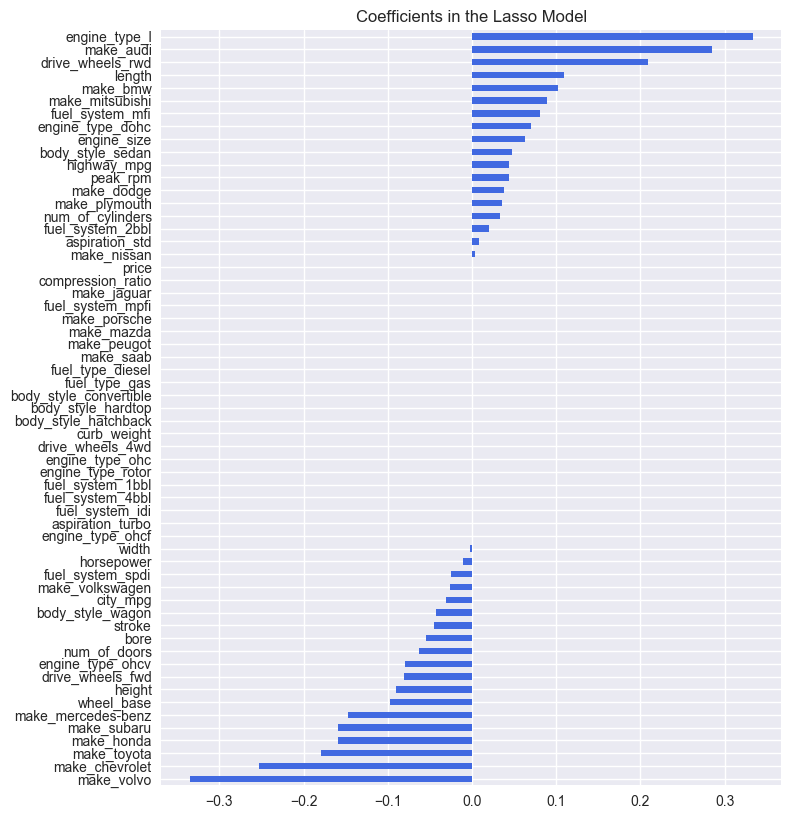

In [74]:
plt.figure(figsize=(8,10), dpi=100)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh", color="royalblue")
plt.title("Coefficients in the Lasso Model")
plt.show()

## Ridge Regression

Ridge Regression was also done with same steps like Lasso Reregression.

/Users/sinsanghun/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Optimal Alpha :  0.790604321091


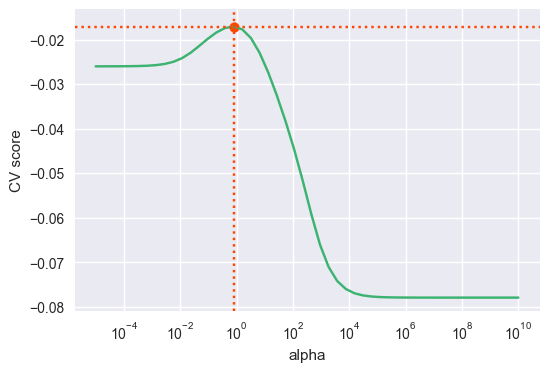

In [75]:
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score


ridge = Ridge()
alphas = np.logspace(-5, 10, 50)

scores = list()

for alpha in alphas:
    ridge.alpha = alpha
    this_scores = cross_val_score(ridge, X_train, y_train, "neg_mean_squared_error", cv=10)
    scores.append(np.mean(this_scores))

print("Optimal Alpha : ", alphas[np.argmax(scores)])    
optimal_ridge = alphas[np.argmax(scores)]

plt.figure(dpi=100)
plt.semilogx(alphas, scores, color="mediumseagreen")
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle=':', color="orangered")
plt.axvline(alphas[np.argmax(scores)] , linestyle=':', color="orangered")
plt.scatter(alphas[np.argmax(scores)], np.max(scores), color="orangered")
plt.show()

In [76]:
ridge = Ridge(alpha=optimal_ridge)
ridge.fit(X_train, y_train)

Ridge(alpha=0.79060432109077017, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

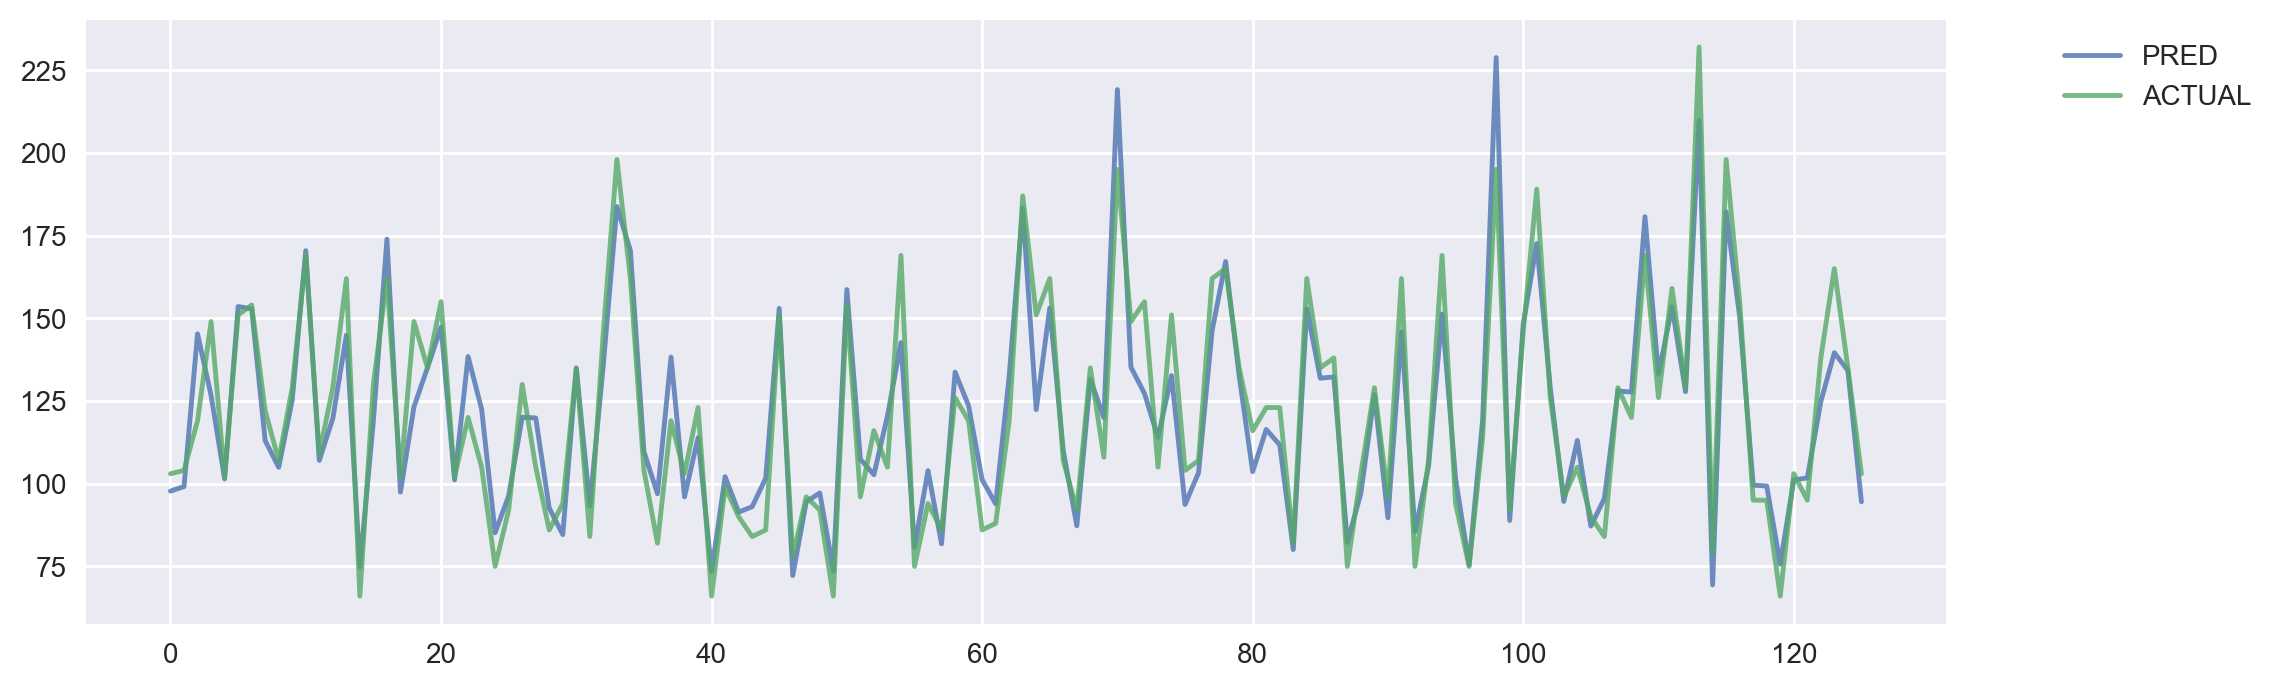

MSE : 129.79295182


In [77]:
pred_line_plot(y_train, X_train, ridge)

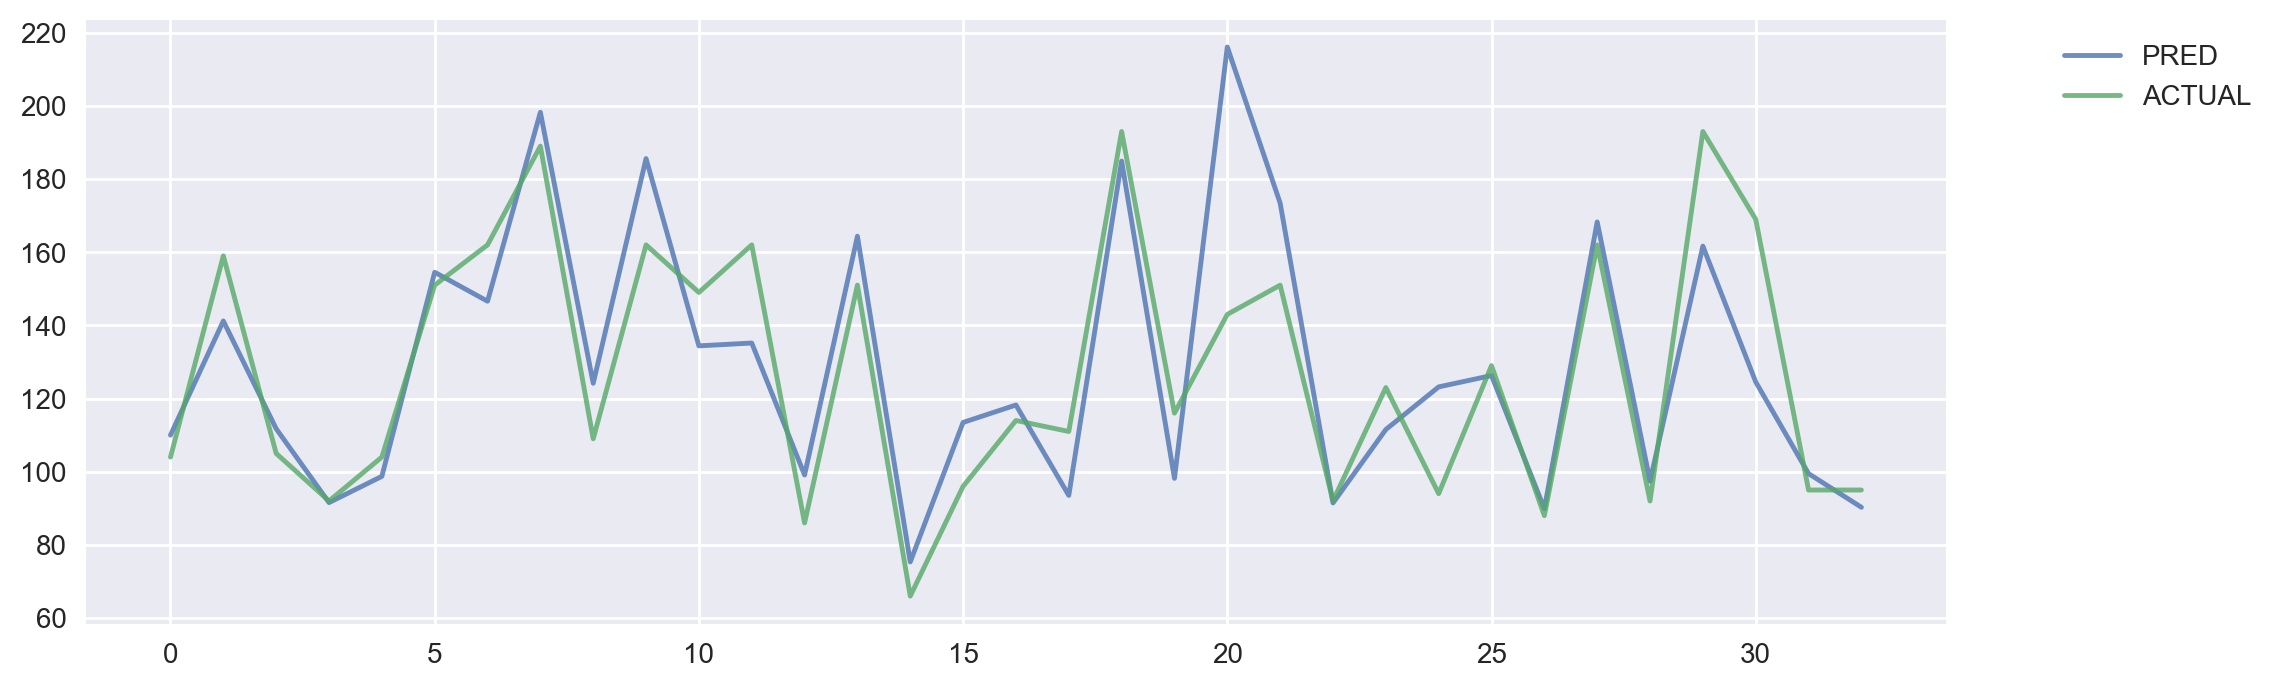

MSE : 419.316760932


In [78]:
pred_line_plot(y_test, X_test, ridge)

### Feature coefficient

The coefficient was not converging into 0 rapidly like lasso.

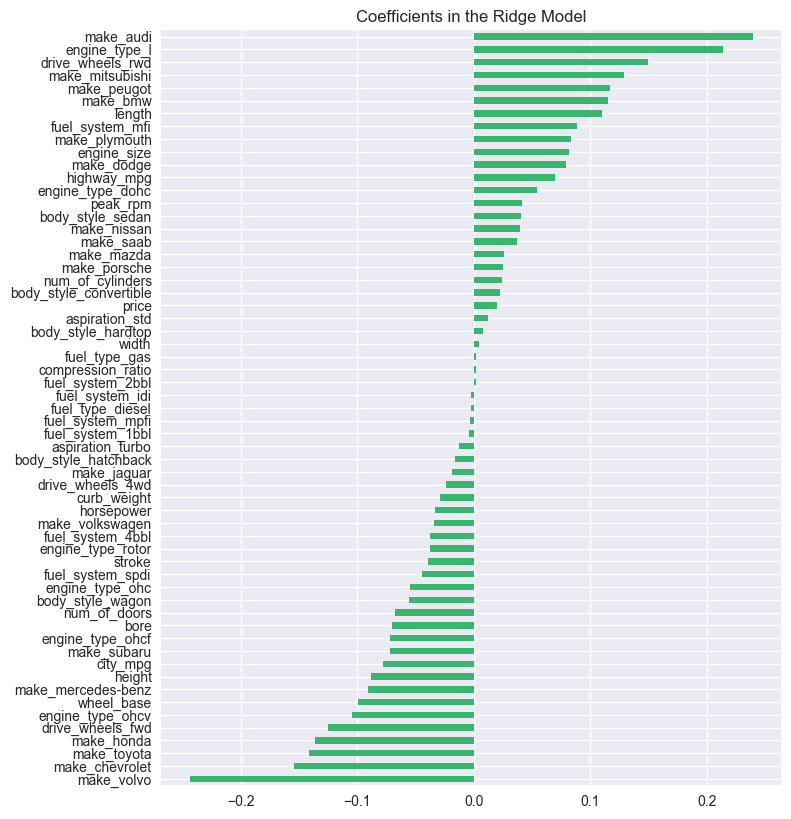

In [79]:
plt.figure(figsize=(8,10), dpi=100)
coef = pd.Series(ridge.coef_[0], index = X_train.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh", color="mediumseagreen")
plt.title("Coefficients in the Ridge Model")
plt.show()

## Predict plot - Test, Lasso, Ridge

Lastly, if you see the comparison between Ridge and Lasso, we can see that Lasso is showing a better performance than that of Ridge.

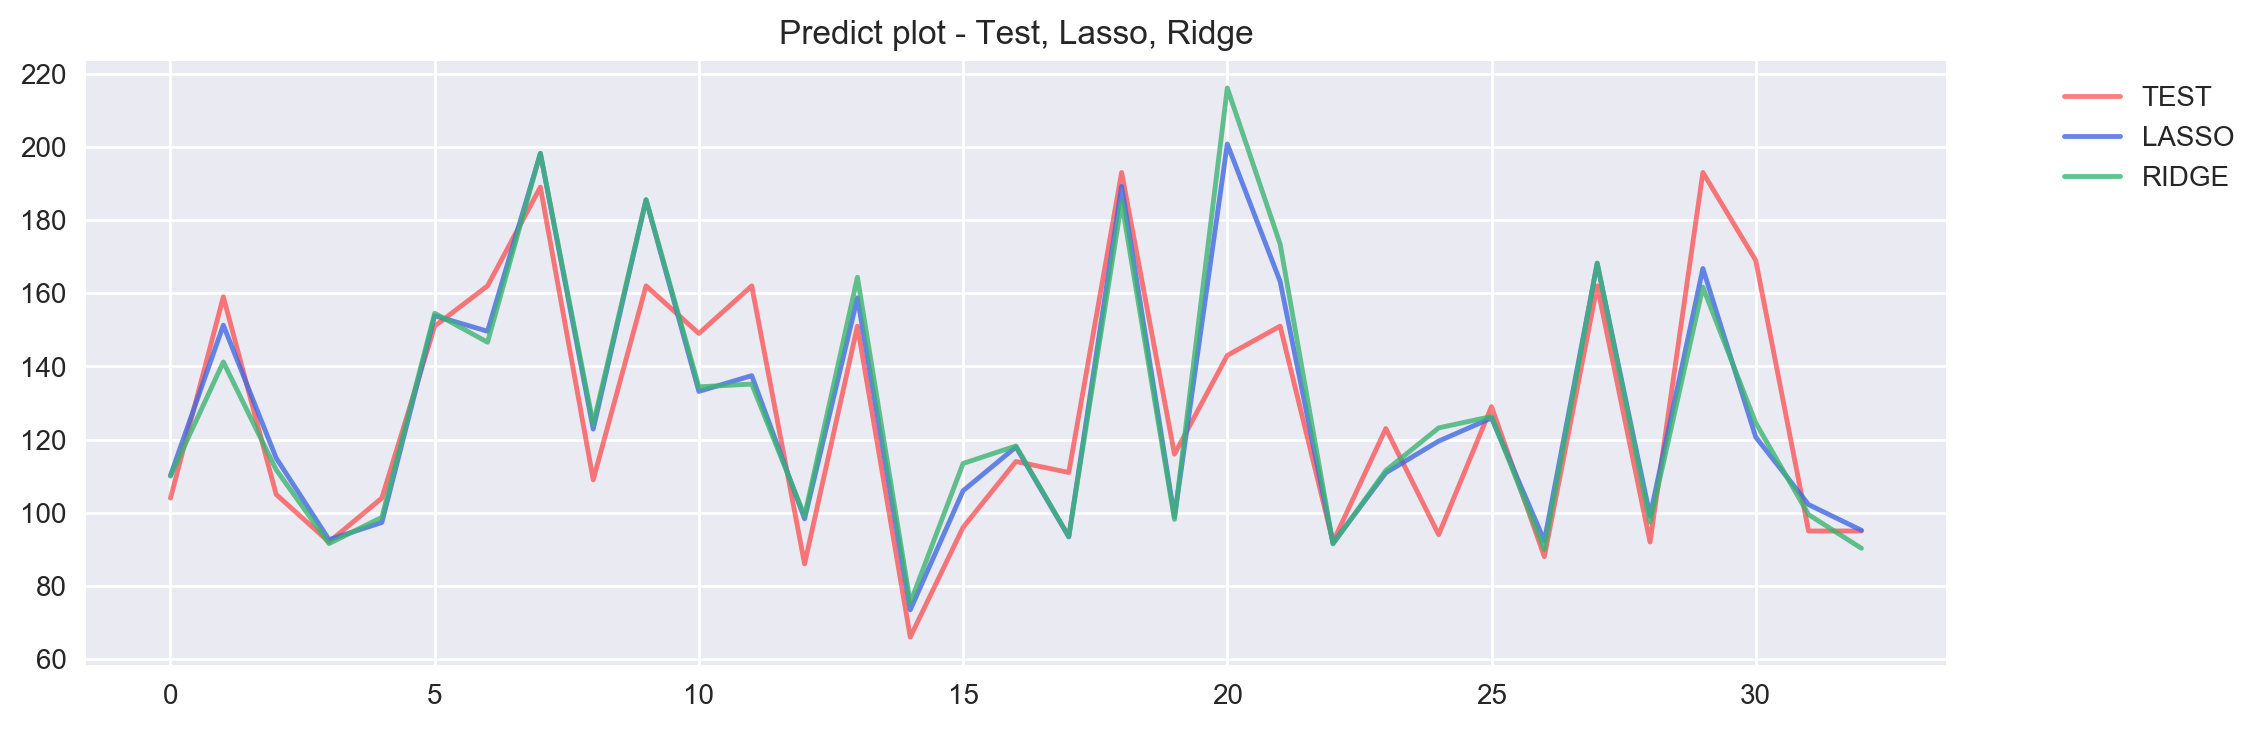

In [80]:
plt.figure(figsize=(12,4), dpi=200)
plt.plot(range(len(y_test)), np.exp(y_test), color="red", alpha=0.5, label="TEST")
plt.plot(range(len(y_test)), np.exp(lasso.predict(X_test)), color="royalblue", alpha=0.8, label="LASSO")
plt.plot(range(len(y_test)), np.exp(ridge.predict(X_test)), color="mediumseagreen", alpha=0.8, label="RIDGE")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title("Predict plot - Test, Lasso, Ridge")
plt.show()

## MSE - Lasso, Ridge

In [81]:
from sklearn.metrics import mean_squared_error
print("LASSO REGRESSION's MSE :", mean_squared_error(np.exp(y_test), np.exp(lasso.predict(X_test))))
print("RIDGE REGRESSION's MSE :", mean_squared_error(np.exp(y_test), np.exp(ridge.predict(X_test))))

LASSO REGRESSION's MSE : 320.284153739
RIDGE REGRESSION's MSE : 419.316760932


## Conclusion 

I confirmed MSE of lasso and ridge models serveral times through changing randam_state number. Every time I did, Scores were very different.  I thought it depends on what data is included in test data and train data in data splitting process. I thought it was result from small data.